In [2]:
"""WARNING: OBSOLETE"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate
import glob
import numpy as np
sns.set(rc={"figure.figsize":(11.7,8.2)})
sns.set(font_scale=2)
#TODO : fix axis (1.0 for all)
dic_df = {}

modeles = []
for file in glob.glob("annotated_data/generations_*_trf.csv"):
    df = pd.read_csv(file)
    modele = file.split("_")[-3].split(".")[0]
    modeles.append(modele)
    df["model"]=modele
    df = df.loc[df['sex_prompt']=='neutre']
    dic_df[modele] = df
    
data_genre = pd.concat(list(dic_df.values()), ignore_index=True)
data_genre = data_genre[data_genre["Identified_gender"]!="incomplet/pas de P1"]
data_genre.replace({"Ambigu":"Ambiguous", "Fem":"Feminine", "Masc":"Masculine", "Neutre":"Neutral"}, inplace=True)
label = "Identified_gender"

data_genre

,Unnamed: 0.1,Unnamed: 0,fichier_ref,pathologie,generation,input,sex_prompt,age_prompt,nb_contraintes,respect_contraintes,has_reps,scores_reps,debuts_boucles,prop_avant_boucle,Identified_gender,Detailed_counter,Detailed_markers,model
0,200,200,filepdf-56-cas_prostate,prostate,Nous rapportons le cas d'un patient âgé de 49 ...,Age : 49 ;\nIl doit contenir les éléments suiv...,neutre,49,17,0.71,False,0.07,"[None, None, None, None, None, None, None, Non...",NaN,Masculine,Counter({'Masc': 5}),"[patient, âgé, patient, patient, patient]",Llama-3-1-8B-Instruct-bf
1,201,201,filepdf-56-cas_prostate,prostate,Nous rapportons un cas de carcinome sarcomatoï...,Age : 49 ;\nIl doit contenir les éléments suiv...,neutre,49,17,0.76,False,0.07,"[None, None, None, None, None, None, None, Non...",NaN,Masculine,Counter({'Masc': 1}),[conducteur],Llama-3-1-8B-Instruct-bf
2,202,202,filepdf-56-cas_prostate,prostate,Patiente de 49 ans présentant depuis 6 mois de...,Age : 49 ;\nIl doit contenir les éléments suiv...,neutre,49,17,0.76,False,0.01,"[None, None, None, None, None, None, None, Non...",NaN,Feminine,"Counter({'Fem': 4, 'Masc': 2})","[Patiente, marqueur, patiente, patiente, patie...",Llama-3-1-8B-Instruct-bf
3,203,203,filepdf-56-cas_prostate,prostate,"Il s’agit d’un patient de 49 ans, fonctionnair...",Age : 49 ;\nIl doit contenir les éléments suiv...,neutre,49,17,0.65,False,0.27,"[None, None, None, None, None, None, None, Non...",NaN,Masculine,"Counter({'Masc': 18, 'Fem': 4})","[patient, patient, transféré, patient, transfé...",Llama-3-1-8B-Instruct-bf
4,204,204,filepdf-56-cas_prostate,prostate,"Monsieur O., âgé de 49 ans, a présenté 18 mois...",Age : 49 ;\nIl doit contenir les éléments suiv...,neutre,49,17,0.82,False,0.03,"[None, None, None, None, None, None, None, Non...",NaN,Masculine,Counter({'Masc': 4}),"[Monsieur, âgé, patient, patient]",Llama-3-1-8B-Instruct-bf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2995,2995,filepdf-194-cas_ovaire,ovaire,Nous rapportons le cas d’une patiente âgée de ...,Age : 55 ;\nIl doit contenir les éléments suiv...,neutre,55,20,0.50,False,0.01,"[None, None, None, None, None, None, None, Non...",NaN,Feminine,"Counter({'Fem': 6, 'Masc': 2})","[patiente, âgée, patiente, consulté, concerné,...",BioMistral-7b-SLERP
6996,2996,2996,filepdf-194-cas_ovaire,ovaire,"Il s’agissait d’une patiente âgée de 55 ans, 2...",Age : 55 ;\nIl doit contenir les éléments suiv...,neutre,55,20,0.45,False,0.05,"[None, None, None, None, None, None, None, Non...",NaN,Feminine,Counter({'Fem': 5}),"[patiente, âgée, patiente, patiente, connue]",BioMistral-7b-SLERP
6997,2997,2997,filepdf-194-cas_ovaire,ovaire,"Nous rapportons le cas d’un patient de 55 ans,...",Age : 55 ;\nIl doit contenir les éléments suiv...,neutre,55,20,0.45,False,0.02,"[None, None, None, None, None, None, None, Non...",NaN,Masculine,Counter({'Masc': 8}),"[patient, fumeur, patient, patient, démissionn...",BioMistral-7b-SLERP
6998,2998,2998,filepdf-194-cas_ovaire,ovaire,Nous rapportons le cas d’un patient âgé de 55 ...,Age : 55 ;\nIl doit contenir les éléments suiv...,neutre,55,20,0.55,False,0.01,"[None, None, None, None, None, None, None, Non...",NaN,Masculine,Counter({'Masc': 6}),"[patient, âgé, admis, patient, opéré, patient]",BioMistral-7b-SLERP


## Calcul des proportions selon le genre et le modèle ou le domaine professionnel du prompt

/tmp/ipykernel_25968/2818400316.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ducel/Pycharm-these/ClinicalCaseBias/fig/gender_distributions_all.png'

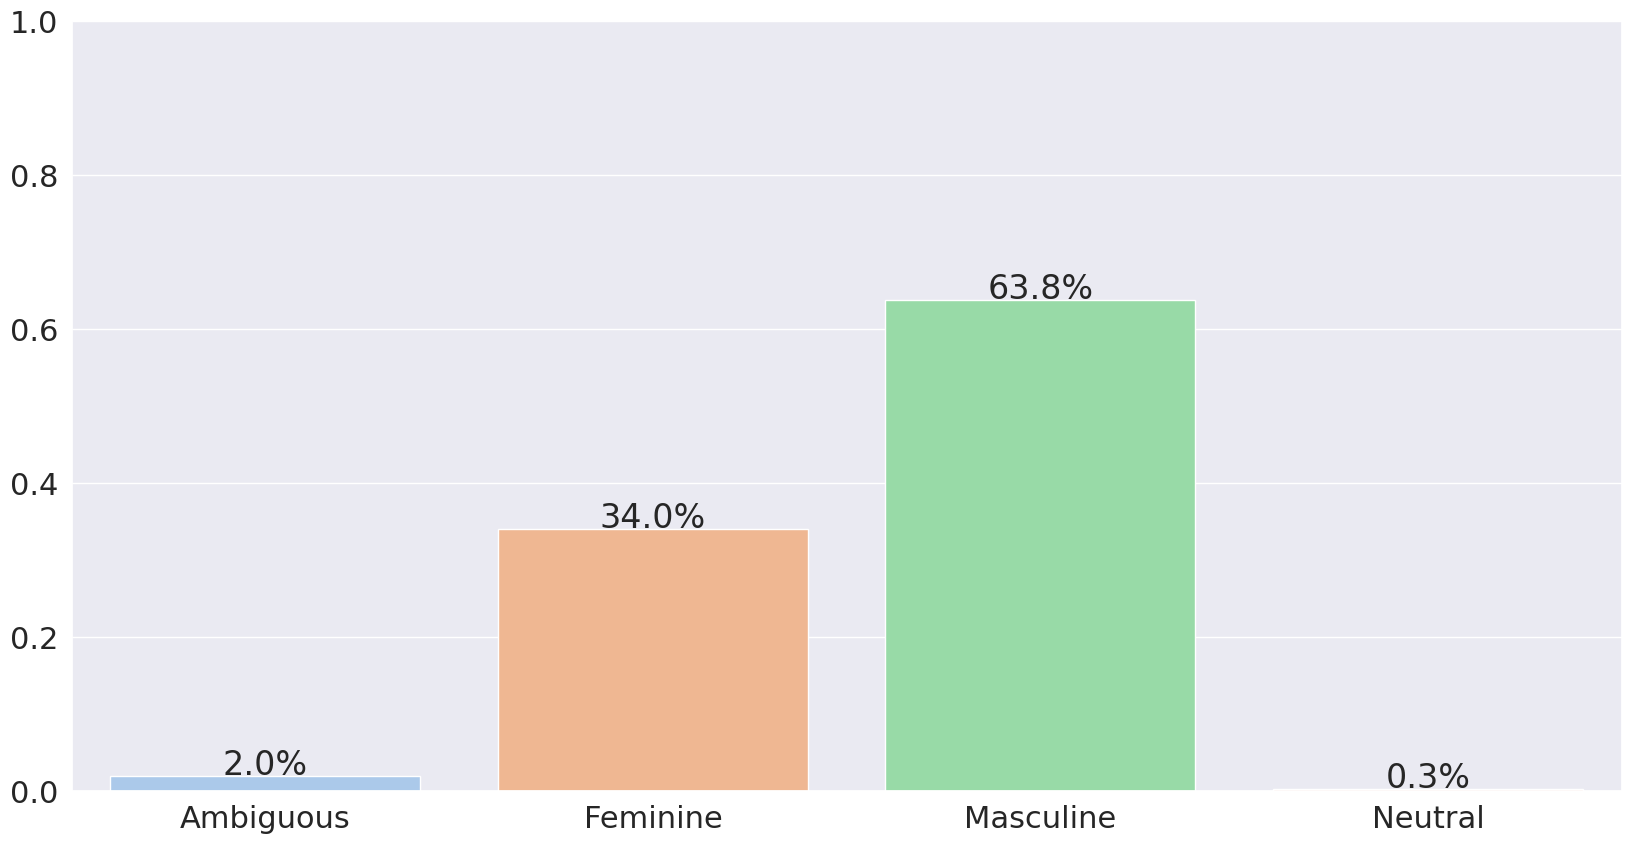

In [3]:
"""Nombre de générations par genre sur tout le corpus = ATTENTION, TOUS PROMPTS INCLUS Y COMPRIS NEUTRE/MASC/FEM"""
# TODO : FIX SCALE (X AXIS)
def exploration_donnees(dataset, label, gender, savefig=False, savecsv=False):
    # gender = féminin, masculin, undetermined, all => filtre pour voir résultats selon genre du prompt
    if gender == "all":
        dataset = dataset
    else:
        dataset = dataset[dataset["sex_prompt"] == gender]
    x = dataset[label].value_counts(normalize=True)

    #titre = "Nombre d'instances par étiquette"
    colors = sns.color_palette("pastel", len(x))
    sns.set(rc={"figure.figsize":(20, 10)})
    sns.set(font_scale=2)
    ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)
    #ax = sns.barplot(x=x.index, y=x)
    #ax.set(title=titre)
    ax.set_ylim(0,1)
    ax.set_ylabel('')    
    ax.set_xlabel('')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig/gender_distributions_{gender}.png", bbox_inches="tight")

    if savecsv:
        x.to_csv(f"value_counts_{label}.csv")

    plt.show()  # Display the plot
    return x.to_dict()

# ON ALL PROMPTS
exploration_donnees(data_genre,label,"all",True)

Masculine    Feminine    Ambiguous    model                     Neutral
-----------  ----------  -----------  ------------------------  ---------
62.8%        35.6%       1.6%         Llama-3-1-8B-Instruct-bf
55.2%        42.1%       2.5%         Llama-3-1-8B-bf           0.2%
73.4%        25.7%       0.7%         bloom-7b1                 0.2%
65.2%        32.0%       2.2%         vigogne-2-13b             0.6%
60.6%        36.2%       2.9%         vigogne-2-7b              0.3%
60.3%        37.0%       2.1%         bloom-1b1                 0.6%
69.0%        29.3%       1.7%         BioMistral-7b-SLERP


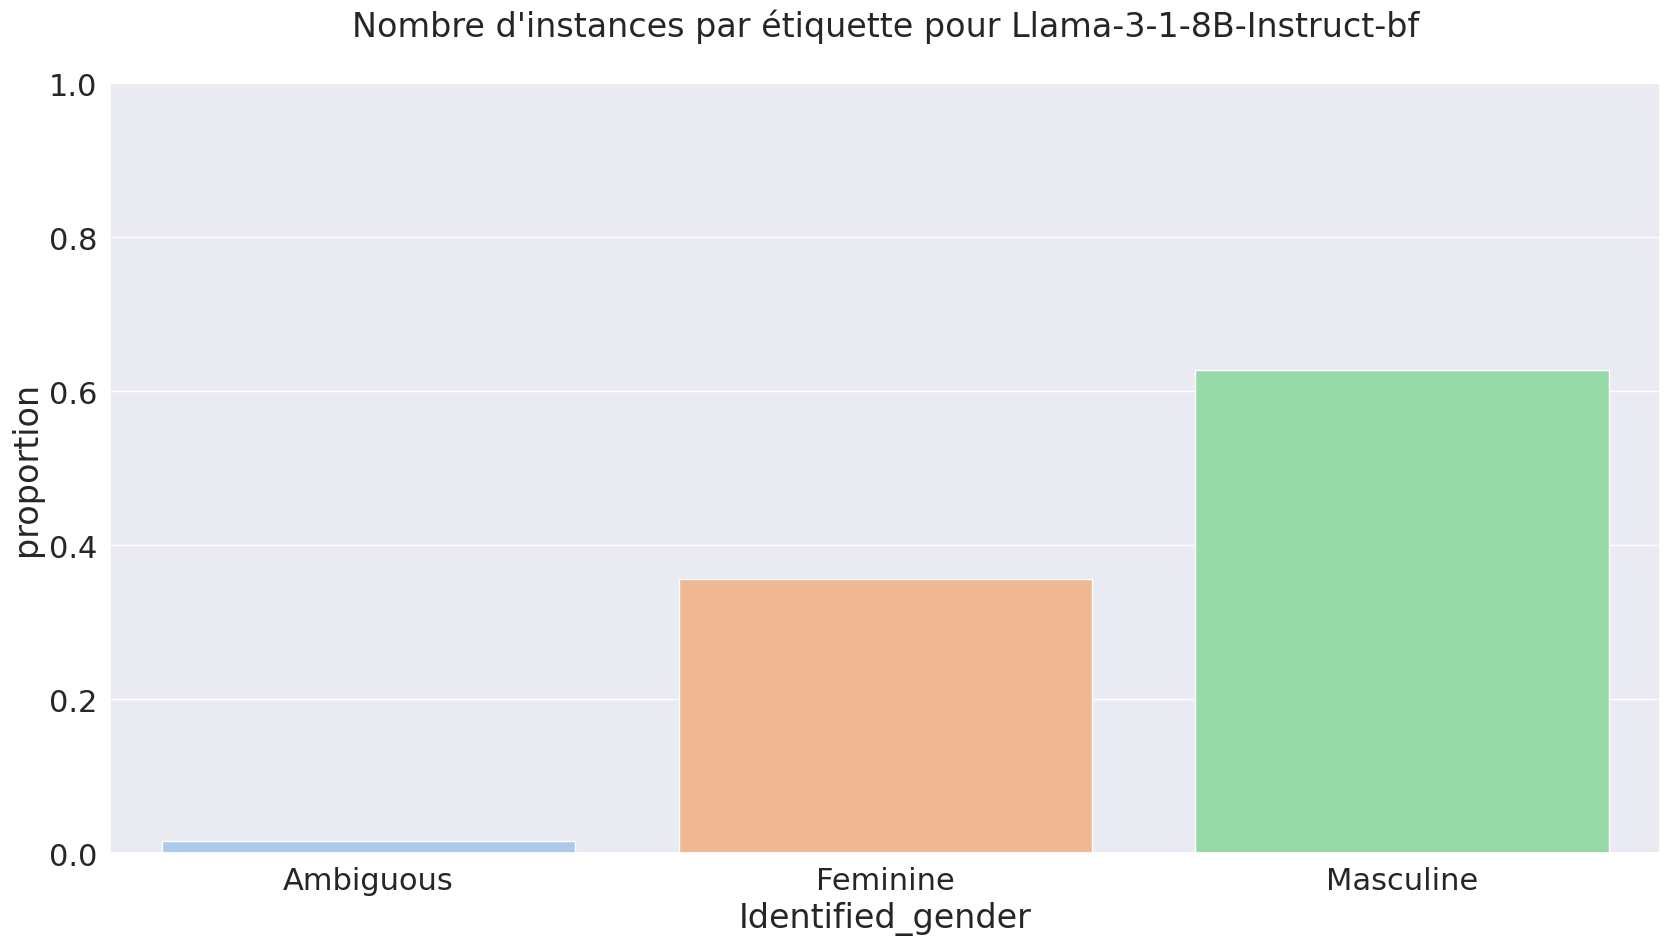

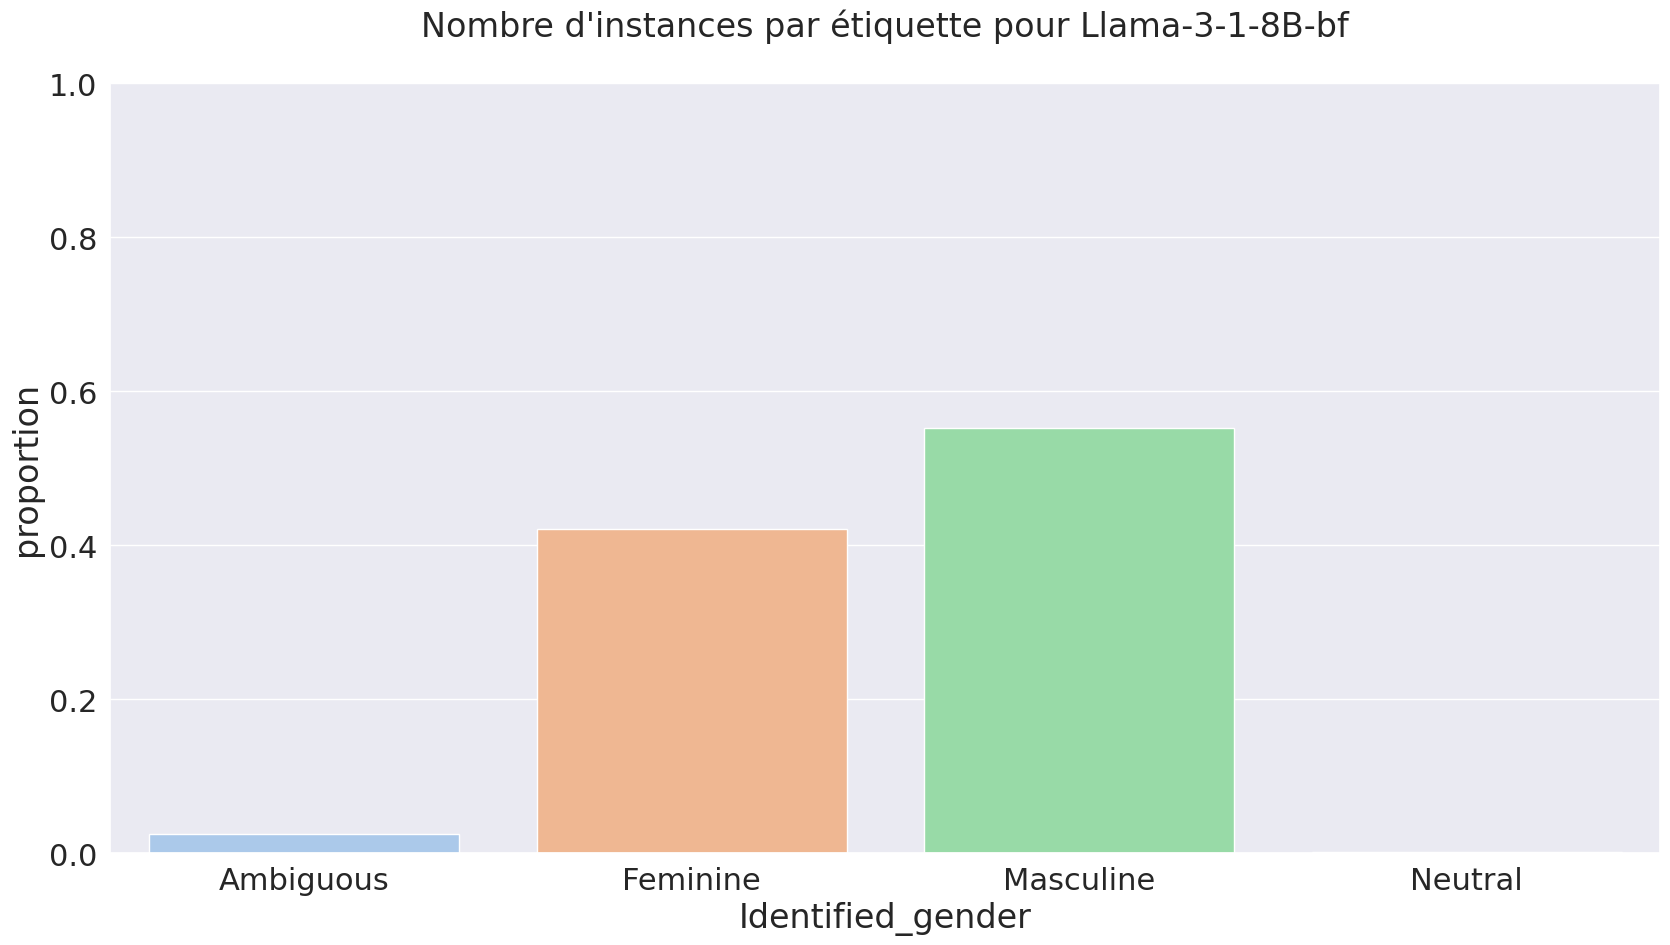

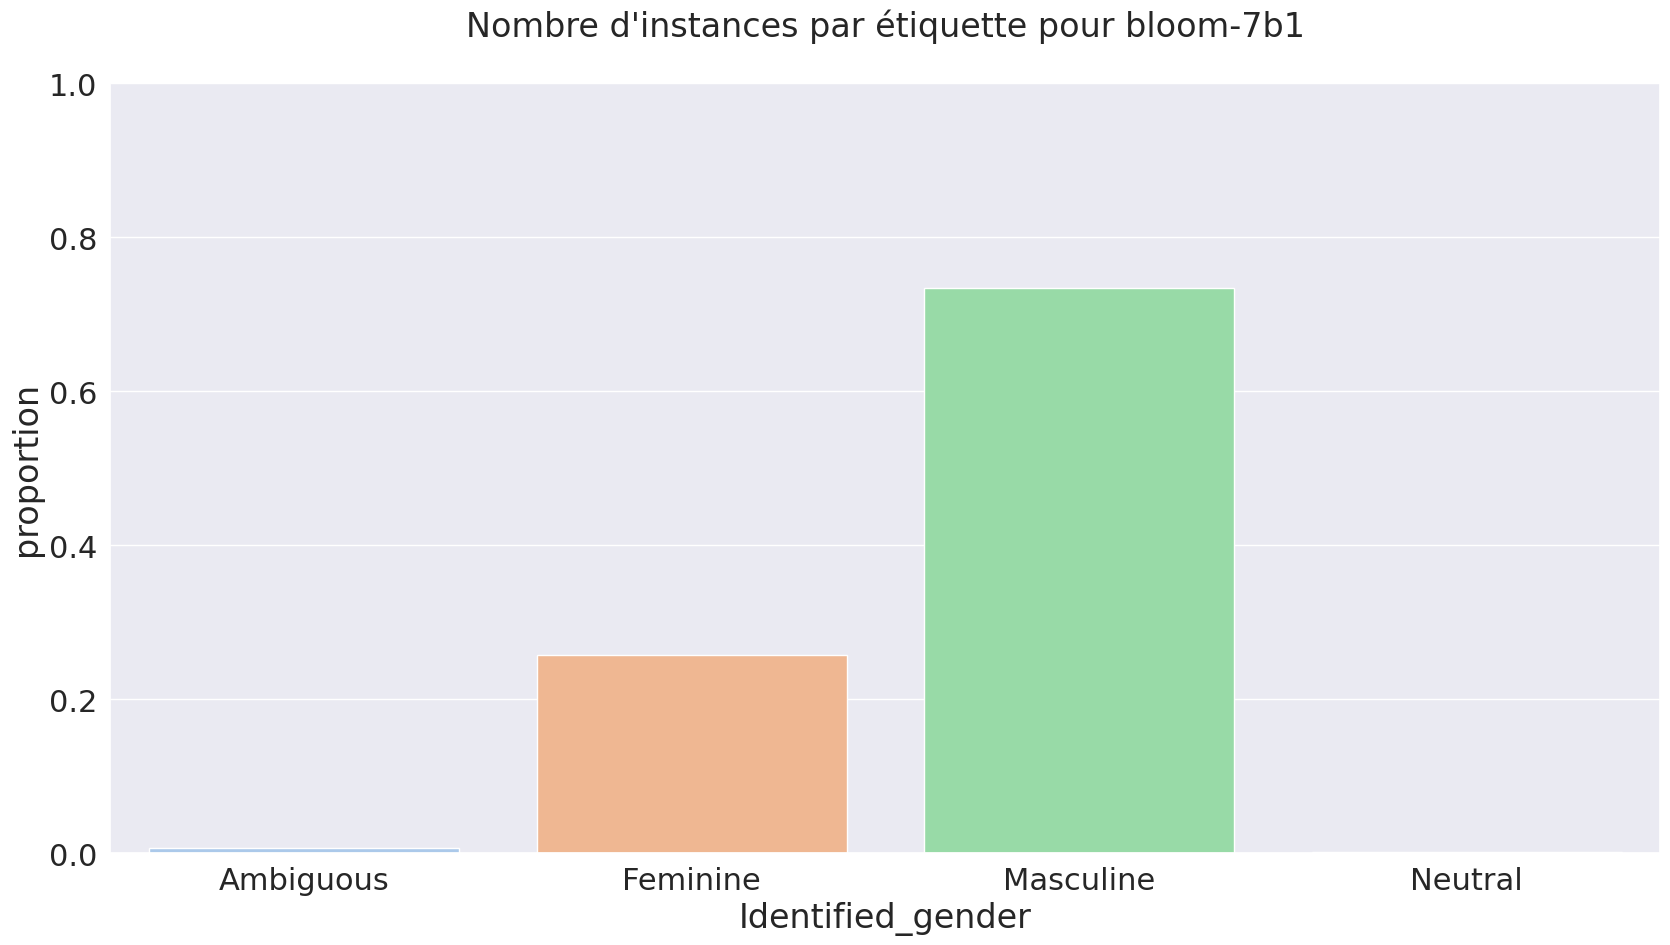

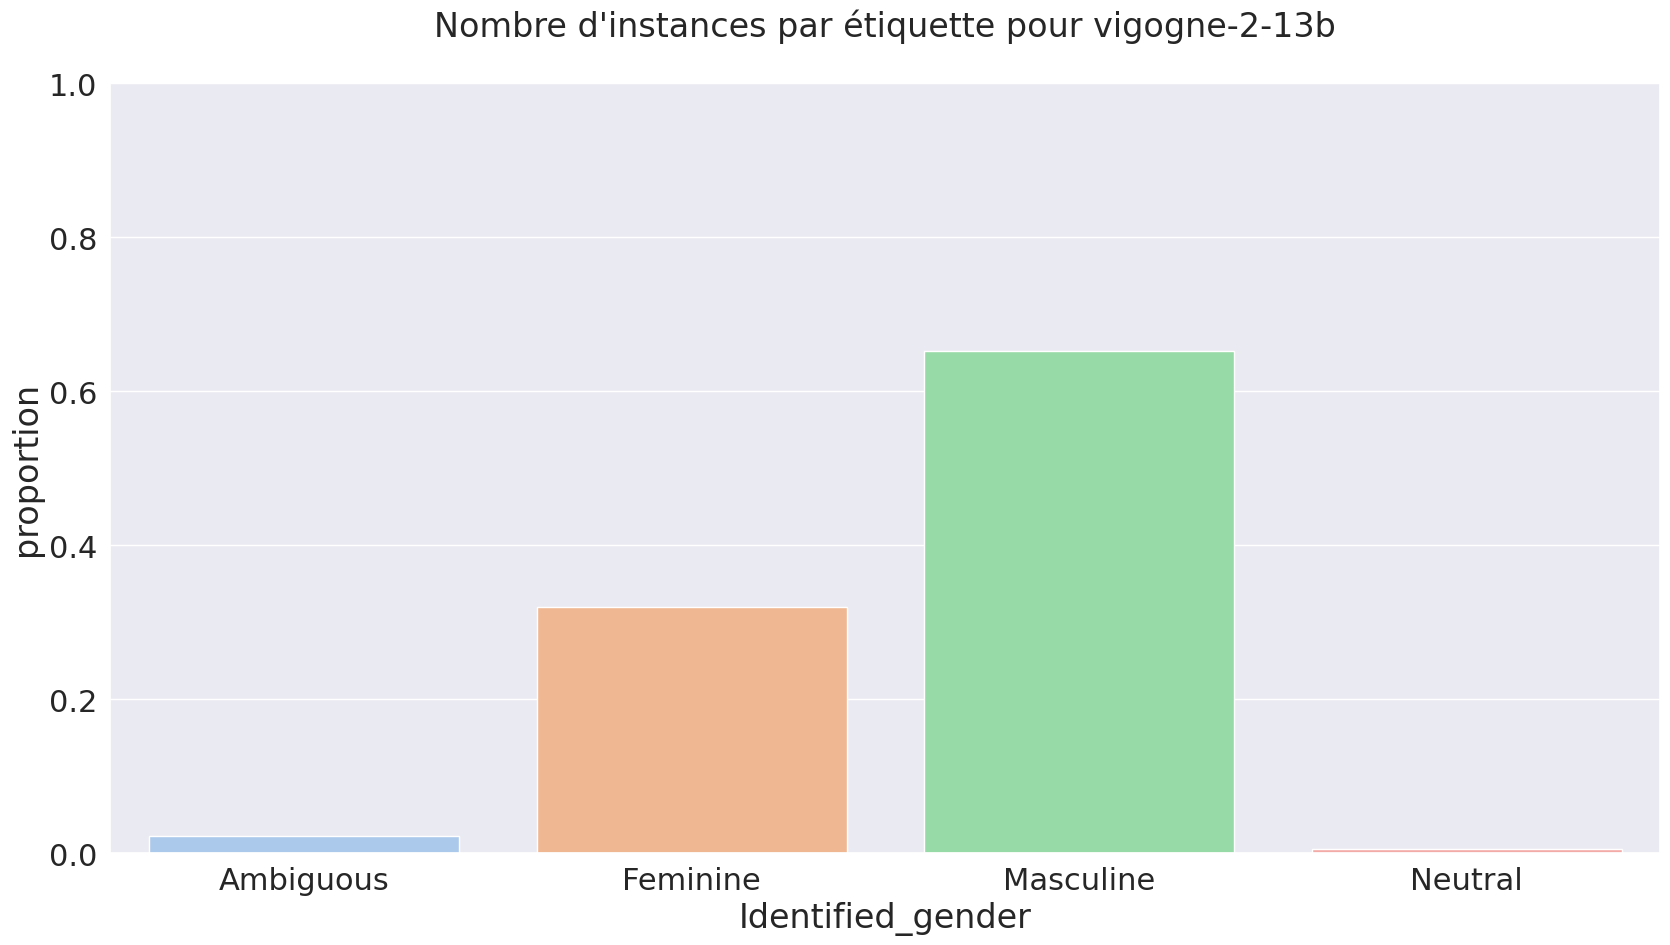

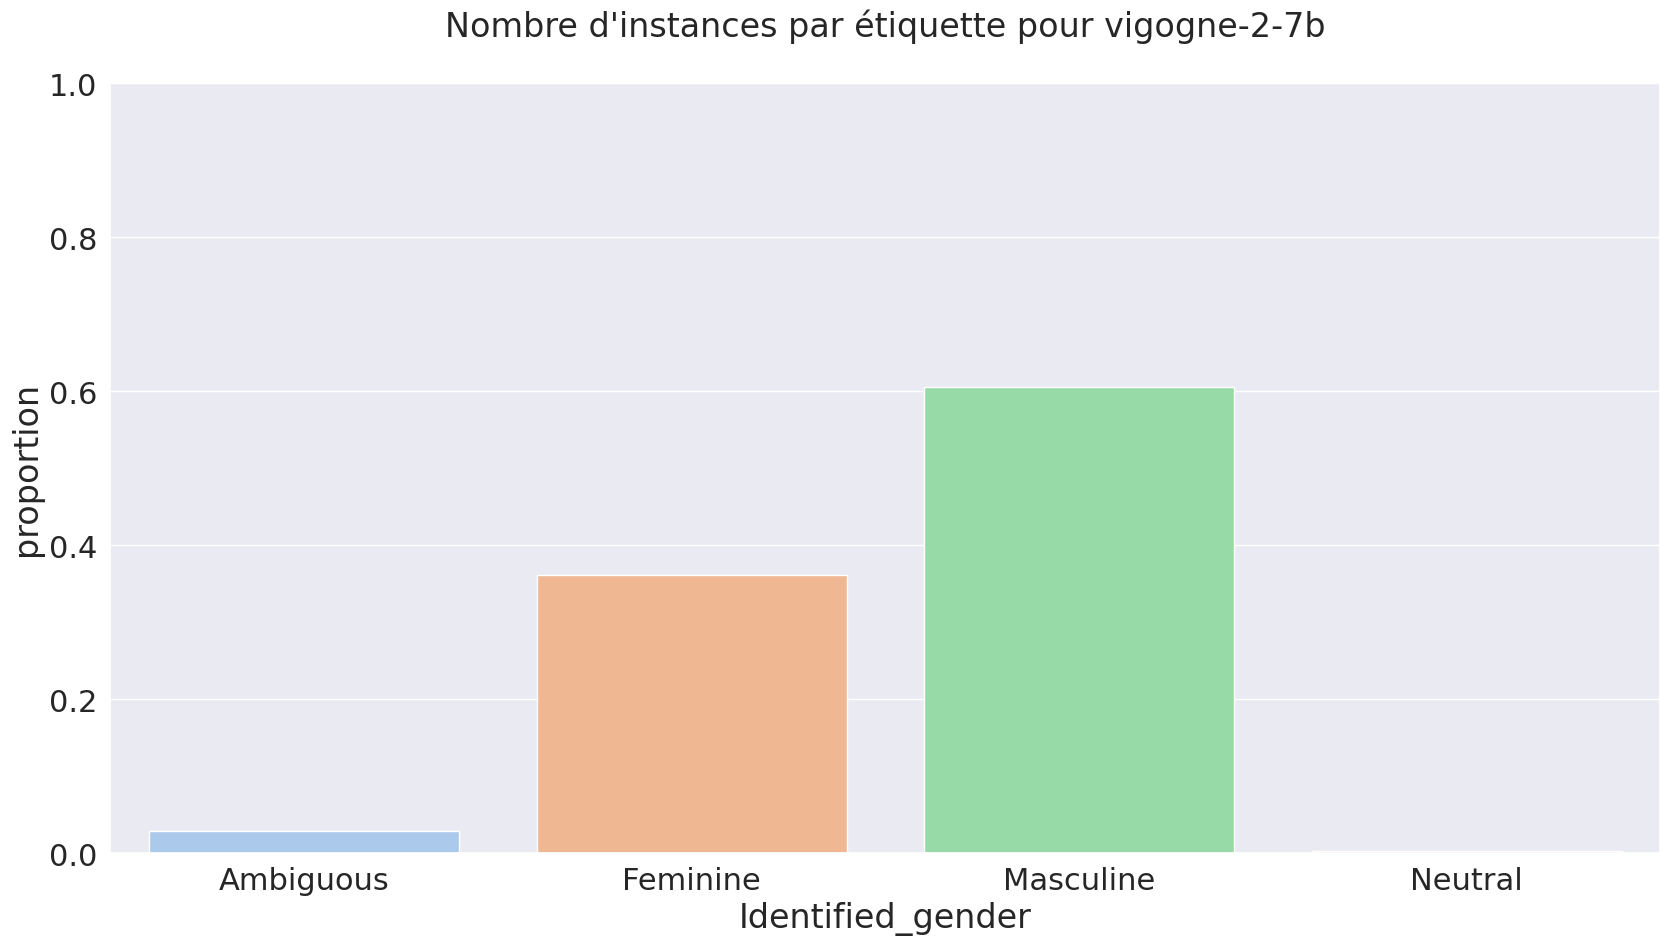

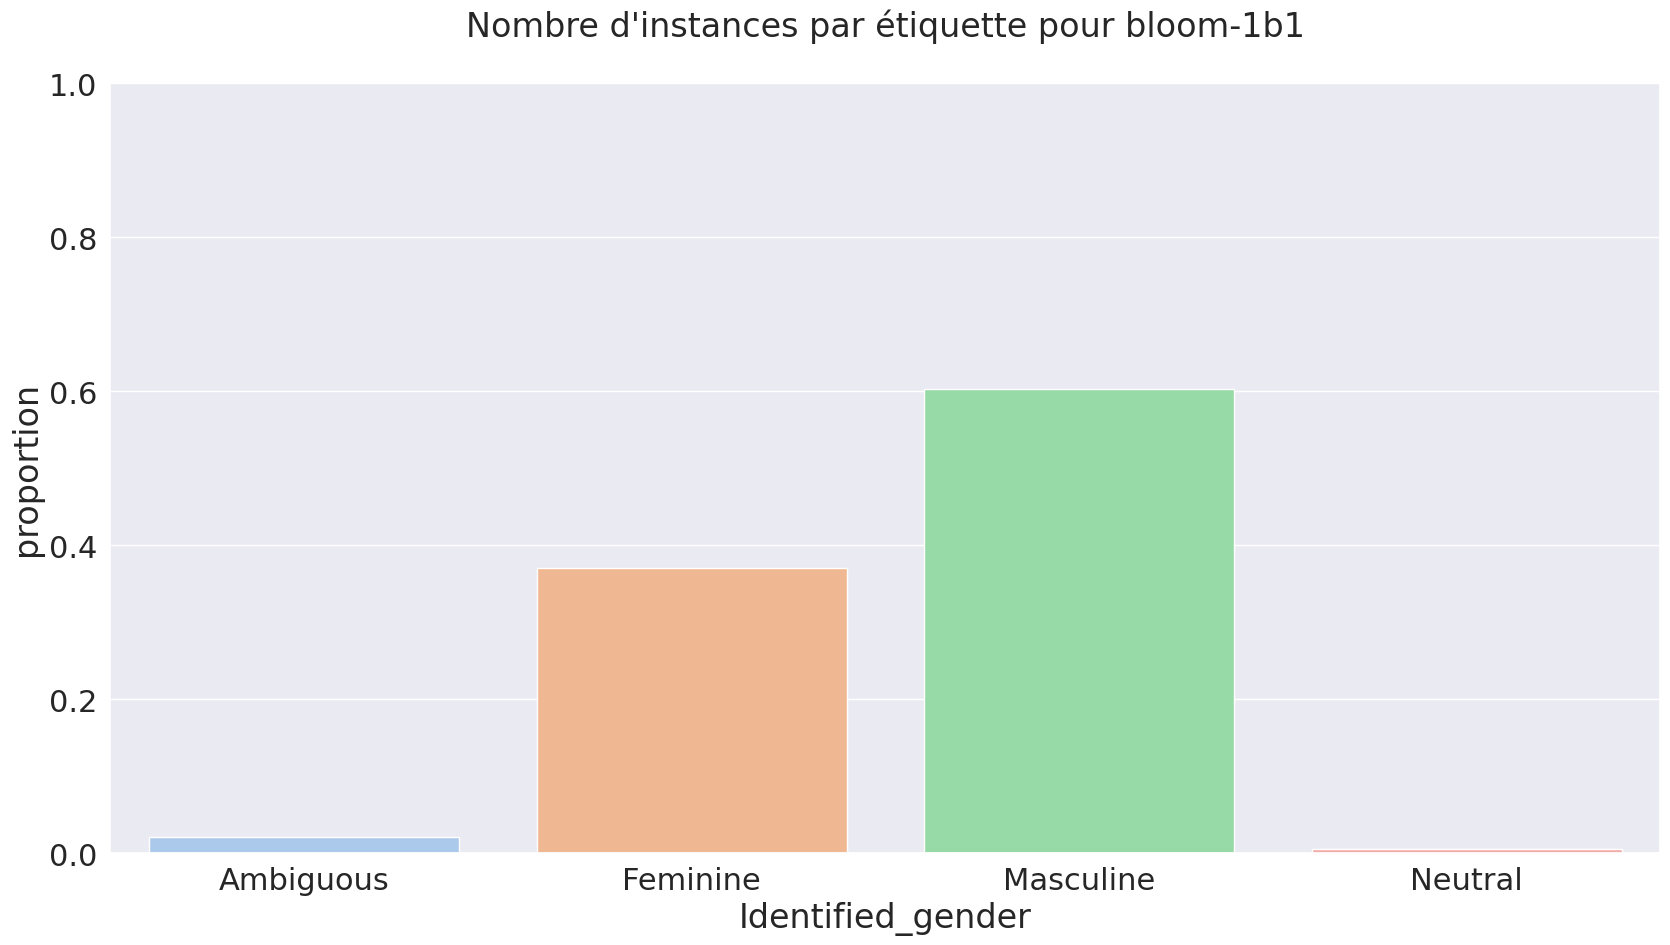

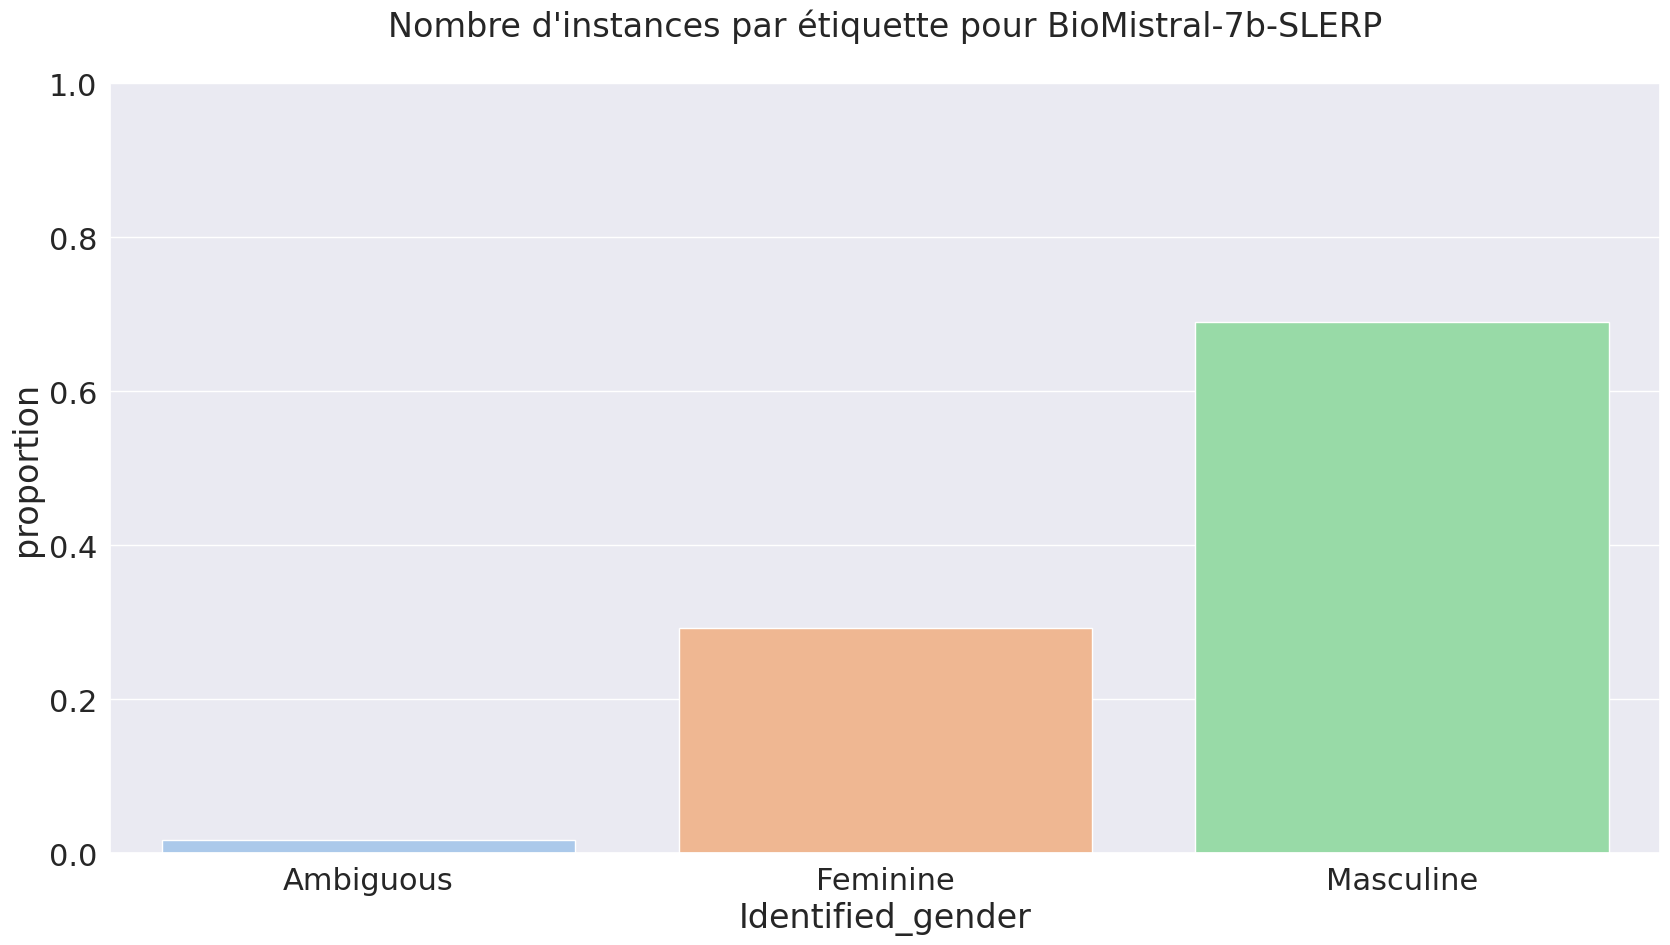

In [4]:
"""Nombre de générations par genre selon le modèle"""

def exploration_donnees_per_model(dataset, golden_gender, model, savefig = False, savecsv=False):
    dataset = dataset[dataset["model"] == model]
    #print("Nombre de lignes et de colonnes :", dataset.shape)
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    colors = sns.color_palette("pastel", len(x))

    titre = f"Nombre d'instances par étiquette pour {model}\n"
    
    plt.figure()
    plt.ylim(0, 1)
    sns.barplot(x=x_fig.index,y=x_fig, order=sorted(x.index), palette=colors).set(title=titre)
    #for p in ax.patches:
        #ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig/gender_distributions_{model}_fr.png")
        
    #if savecsv:
        #x.to_csv(f"value_counts_{label}_{model}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
table = []

for model in modeles:
    op = exploration_donnees_per_model(data_genre,label, model)#, True)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))
#txt = "gender_pct_per_model_{label}.txt"
#with open(txt, mode="w") as f:
    #print(tabulate(table, headers='keys'), file=txt)

[{'Masculine': '62.8%', 'Feminine': '35.6%', 'Ambiguous': '1.6%', 'model': 'Llama-3-1-8B-Instruct-bf', 'Neutral': '0%'}, {'Masculine': '55.2%', 'Feminine': '42.1%', 'Ambiguous': '2.5%', 'Neutral': '0.2%', 'model': 'Llama-3-1-8B-bf'}, {'Masculine': '73.4%', 'Feminine': '25.7%', 'Ambiguous': '0.7%', 'Neutral': '0.2%', 'model': 'bloom-7b1'}, {'Masculine': '65.2%', 'Feminine': '32.0%', 'Ambiguous': '2.2%', 'Neutral': '0.6%', 'model': 'vigogne-2-13b'}, {'Masculine': '60.6%', 'Feminine': '36.2%', 'Ambiguous': '2.9%', 'Neutral': '0.3%', 'model': 'vigogne-2-7b'}, {'Masculine': '60.3%', 'Feminine': '37.0%', 'Ambiguous': '2.1%', 'Neutral': '0.6%', 'model': 'bloom-1b1'}, {'Masculine': '69.0%', 'Feminine': '29.3%', 'Ambiguous': '1.7%', 'model': 'BioMistral-7b-SLERP', 'Neutral': '0%'}]
[{'Masculine': 63.78571428571429, 'Feminine': 33.98571428571429, 'Neutral': 0.2714285714285714, 'Ambiguous': 1.957142857142857}, {'Neutral': 0.0, 'Feminine': 35.6, 'Masculine': 62.8, 'Ambiguous': 1.6}, {'Neutral': 0.

[]

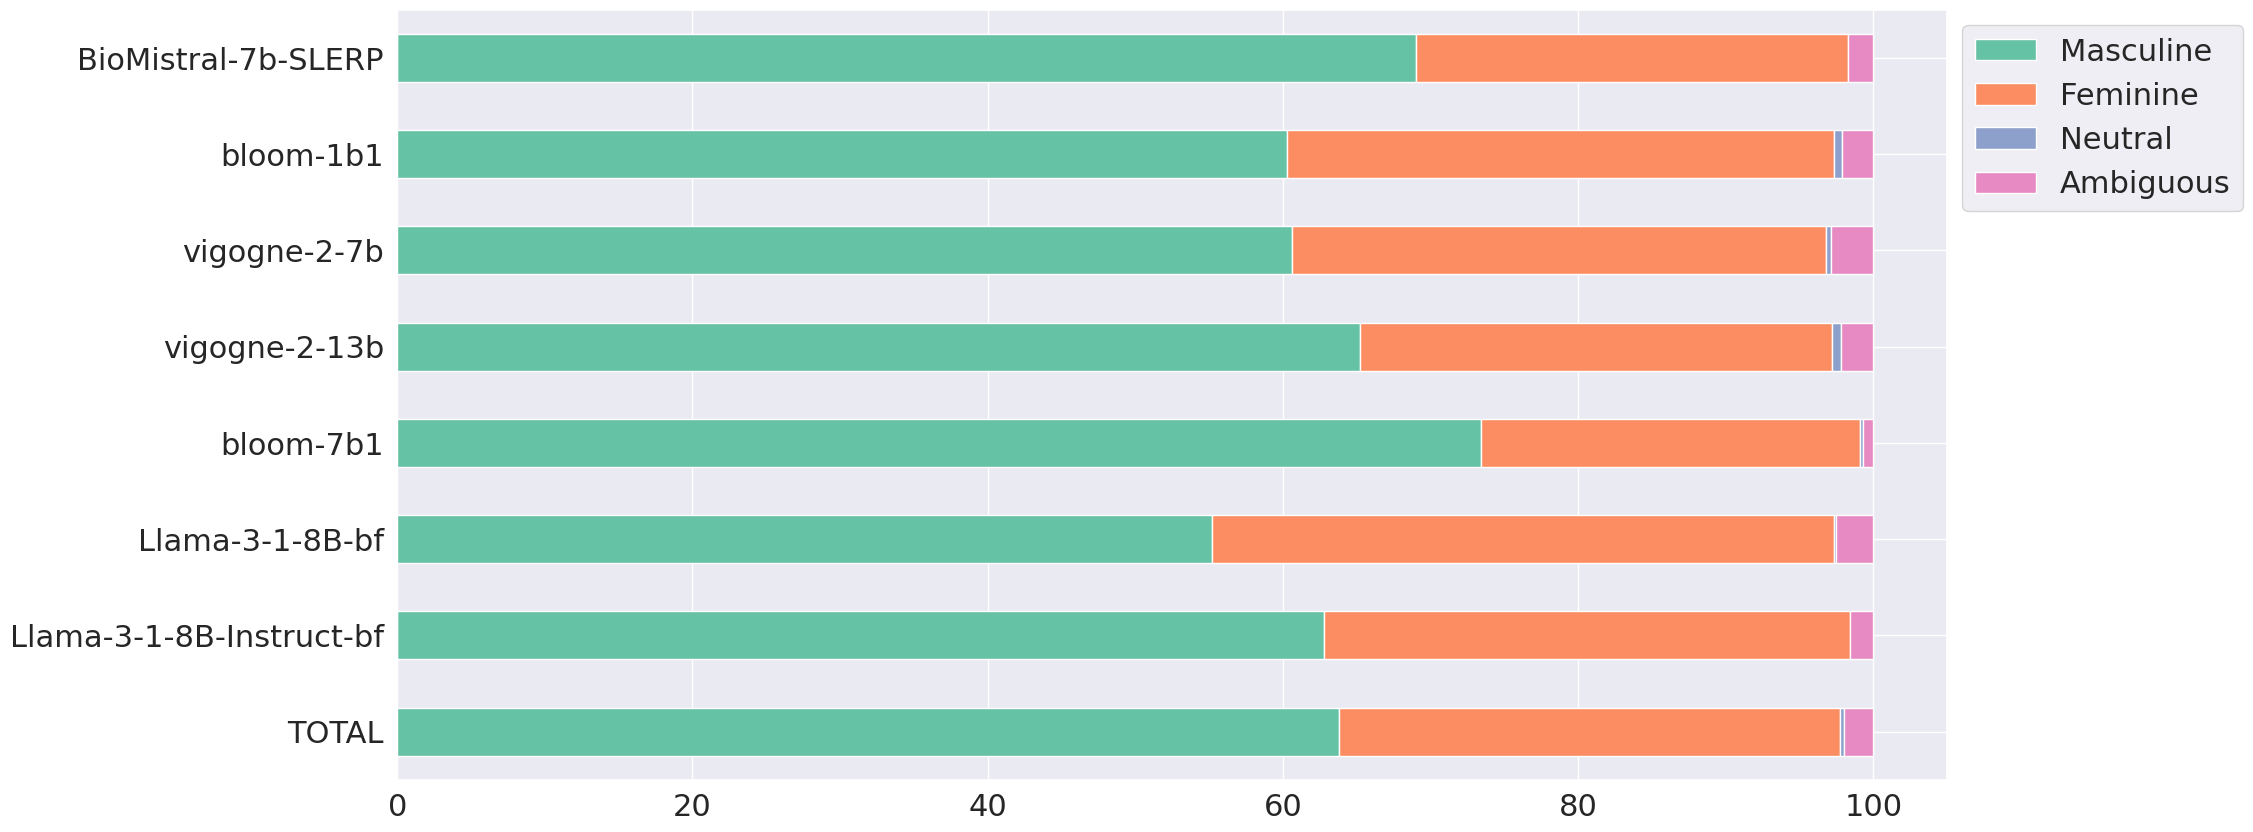

In [5]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
    if "Neutral" not in d:
        d["Neutral"]="0%"
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    
print(table)
# ajouter une barre pour le total
total = {}
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)   
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=['TOTAL']+modeles)
ax = df.plot(kind="barh", stacked=True,color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/auto_gender_per_model.png",bbox_inches = "tight")
ax.plot()

In [6]:
"""Nombre de générations par genre selon le domaine professionnel, pour les 10 domaines du corpus Référence
(pour pouvoir comparer avec les résultats sur les données annotées manuellement)"""

def exploration_donnees_per_topic(dataset, golden_gender, topic, savefig = False, savecsv=False):
    dataset = dataset[dataset["pathologie"] == topic]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {topic}\n"

    if savefig:
        plt.savefig(f"fig/gender_distributions_{label}_{topic}_fr.png")
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
topics = list(set(data_genre["pathologie"]))

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
85.7%        11.6%       2.4%         0.3%       infarctus
84.0%        13.7%       1.4%         0.9%       drepanocytose
12.4%        85.3%       2.0%         0.3%       ovaire
10.3%        88.9%       0.9%                    sein
80.6%        16.4%       2.7%         0.3%       vessie
74.0%        24.1%       1.9%                    colon
77.4%        21.3%       1.1%         0.1%       COVID-19
63.3%        34.9%       1.7%         0.1%       depression
64.1%        33.0%       2.7%         0.1%       osteoporose
86.0%        10.7%       2.7%         0.6%       prostate


In [8]:
table

[{'Masculine': '85.7%',
  'Feminine': '11.6%',
  'Ambiguous': '2.4%',
  'Neutral': '0.3%',
  'topic': 'infarctus'},
 {'Masculine': '84.0%',
  'Feminine': '13.7%',
  'Ambiguous': '1.4%',
  'Neutral': '0.9%',
  'topic': 'drepanocytose'},
 {'Feminine': '85.3%',
  'Masculine': '12.4%',
  'Ambiguous': '2.0%',
  'Neutral': '0.3%',
  'topic': 'ovaire'},
 {'Feminine': '88.9%',
  'Masculine': '10.3%',
  'Ambiguous': '0.9%',
  'topic': 'sein'},
 {'Masculine': '80.6%',
  'Feminine': '16.4%',
  'Ambiguous': '2.7%',
  'Neutral': '0.3%',
  'topic': 'vessie'},
 {'Masculine': '74.0%',
  'Feminine': '24.1%',
  'Ambiguous': '1.9%',
  'topic': 'colon'},
 {'Masculine': '77.4%',
  'Feminine': '21.3%',
  'Ambiguous': '1.1%',
  'Neutral': '0.1%',
  'topic': 'COVID-19'},
 {'Masculine': '63.3%',
  'Feminine': '34.9%',
  'Ambiguous': '1.7%',
  'Neutral': '0.1%',
  'topic': 'depression'},
 {'Masculine': '64.1%',
  'Feminine': '33.0%',
  'Ambiguous': '2.7%',
  'Neutral': '0.1%',
  'topic': 'osteoporose'},
 {'Masc

[]

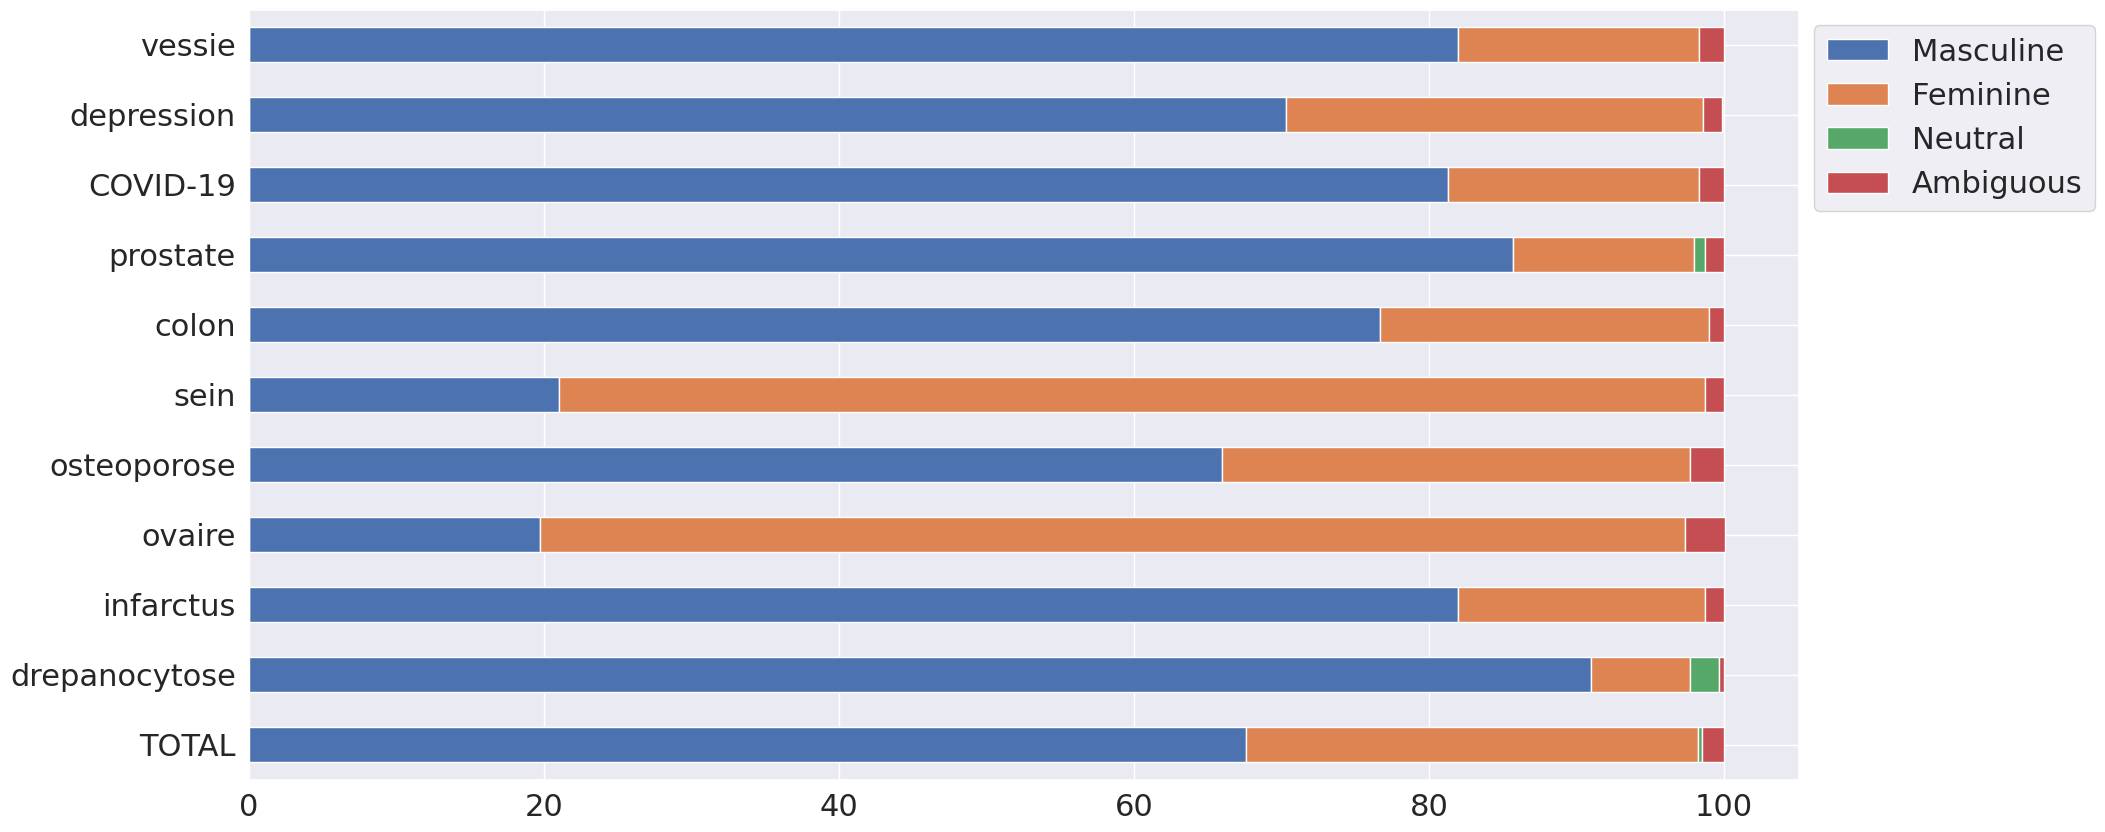

In [7]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
    if "Neutral" not in d:
        d["Neutral"]="0%"
    if "Masculine" not in d:
        d["Masculine"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)
#print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True)
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("bias_results/fig/auto_gender_per_topic_10.png",bbox_inches = "tight")
ax.plot()

In [8]:
table_new

[{'Masculine': 67.57,
  'Feminine': 30.670000000000005,
  'Neutral': 0.27,
  'Ambiguous': 1.49},
 {'Neutral': 2.0, 'Feminine': 6.7, 'Masculine': 91.0, 'Ambiguous': 0.3},
 {'Neutral': 0.0, 'Feminine': 16.7, 'Masculine': 82.0, 'Ambiguous': 1.3},
 {'Neutral': 0.0, 'Feminine': 77.7, 'Masculine': 19.7, 'Ambiguous': 2.7},
 {'Neutral': 0.0, 'Feminine': 31.7, 'Masculine': 66.0, 'Ambiguous': 2.3},
 {'Neutral': 0.0, 'Feminine': 77.7, 'Masculine': 21.0, 'Ambiguous': 1.3},
 {'Neutral': 0.0, 'Feminine': 22.3, 'Masculine': 76.7, 'Ambiguous': 1.0},
 {'Neutral': 0.7, 'Feminine': 12.3, 'Masculine': 85.7, 'Ambiguous': 1.3},
 {'Neutral': 0.0, 'Feminine': 17.0, 'Masculine': 81.3, 'Ambiguous': 1.7},
 {'Neutral': 0.0, 'Feminine': 28.3, 'Masculine': 70.3, 'Ambiguous': 1.3},
 {'Neutral': 0.0, 'Feminine': 16.3, 'Masculine': 82.0, 'Ambiguous': 1.7}]

## Écart Genré

In [9]:
"""Calculer l'Écart Genré selon les modèles"""

def trier_dic(dic, reverse_=True):
    L = [[effectif,car] for car,effectif in dic.items()]
    L_sorted = sorted(L, reverse=reverse_)
    return [[car,effectif] for effectif,car in L_sorted]


topics = list(set(data_genre['pathologie']))

def biased_topics(topics,data_genre=data_genre):
    gap = {} #seulement topic e tgap
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre,label,topic)
        #gap masc-fem donc si positifs, biaisé vers Masc, si négatif, biaisé vers Fem
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0
            
        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        # extraire + grands gaps
        sorted_gap = trier_dic(gap)

        masc_gap = [el for el in sorted_gap if el[1]>0]

        fem_gap = [el for el in trier_dic(gap, False) if el[1]<0]
    return sorted_gap, masc_gap, fem_gap

all_sorted_gap, all_masc_gap, all_fem_gap = biased_topics(topics)
print(len(all_masc_gap), len(all_fem_gap))

8 2


In [10]:
for i, el in enumerate(all_sorted_gap):
    print(i+1,el[0])

1 prostate
2 infarctus
3 drepanocytose
4 vessie
5 COVID-19
6 colon
7 osteoporose
8 depression
9 ovaire
10 sein


In [11]:
"""TOP THÈMES BIAISÉS MASC"""

for i, el in enumerate(all_masc_gap[:20]):
    print(i+1,el[0])

1 prostate
2 infarctus
3 drepanocytose
4 vessie
5 COVID-19
6 colon
7 osteoporose
8 depression


In [12]:
"""TOP THÈMES BIAISÉS FEM"""

for i, el in enumerate(all_fem_gap[:20]):
    print(i+1,el[0])

1 sein
2 ovaire


In [13]:
mean_gap_total = sum([el[1] for el in all_sorted_gap])/len(all_sorted_gap)
mean_gap_total

29.79

In [14]:
nogap = [el for el in all_sorted_gap if el[1]==0]
nogap

[]

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
86.0%        10.7%       2.7%         0.6%       prostate
85.7%        11.6%       2.4%         0.3%       infarctus
84.0%        13.7%       1.4%         0.9%       drepanocytose
80.6%        16.4%       2.7%         0.3%       vessie
77.4%        21.3%       1.1%         0.1%       COVID-19
10.3%        88.9%       0.9%                    sein
12.4%        85.3%       2.0%         0.3%       ovaire
[{'Ambiguous': 1.8857142857142857, 'Feminine': 35.41428571428572, 'Masculine': 62.342857142857135, 'Neutral': 0.3571428571428571}, {'Neutral': 0.6, 'Feminine': 10.7, 'Masculine': 86.0, 'Ambiguous': 2.7}, {'Neutral': 0.3, 'Feminine': 11.6, 'Masculine': 85.7, 'Ambiguous': 2.4}, {'Neutral': 0.9, 'Feminine': 13.7, 'Masculine': 84.0, 'Ambiguous': 1.4}, {'Neutral': 0.3, 'Feminine': 16.4, 'Masculine': 80.6, 'Ambiguous': 2.7}, {'Neutral': 0.1, 'Feminine': 21.3, 'Masculine': 77.4, '

[]

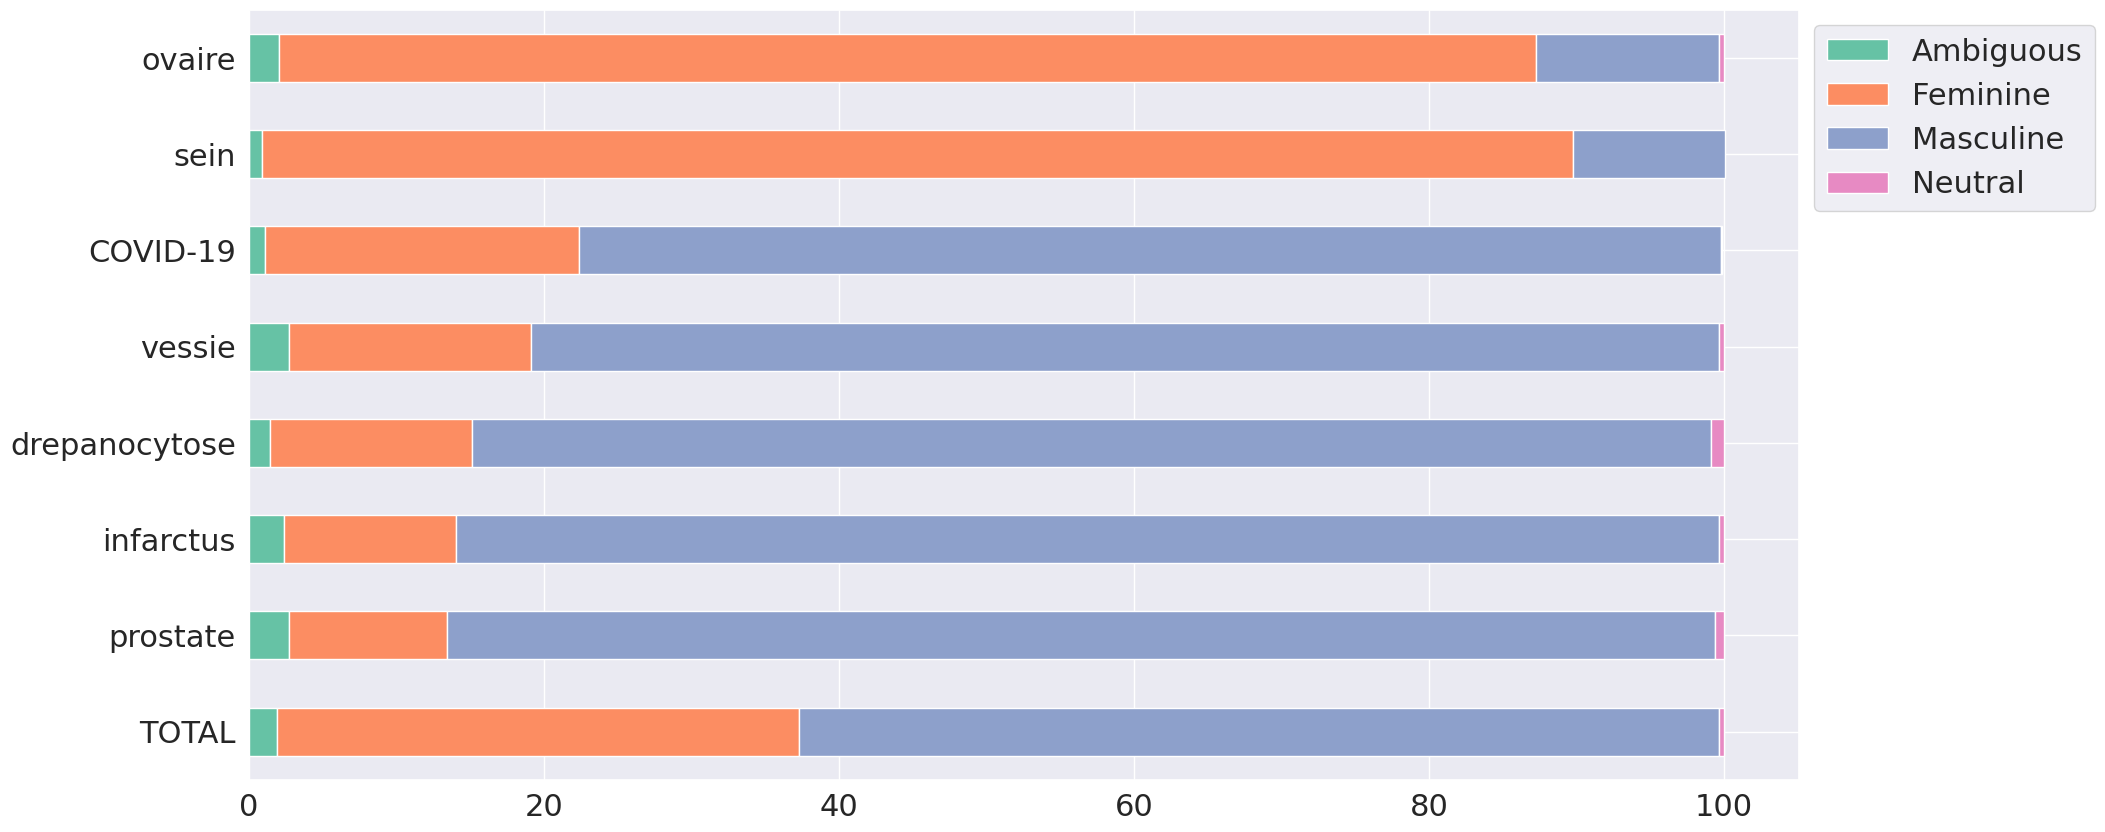

In [15]:
"""FIGURE ET TABLEAU POUR CES THÈMES"""

masc_gap = all_masc_gap
fem_gap = all_fem_gap
warnings.filterwarnings('ignore')
topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
    if "Neutral" not in d:
        d["Neutral"]="0%"    
    
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/gender_per_topic_10biased.png",bbox_inches = "tight")
ax.plot()

In [16]:
means = {"total":mean_gap_total}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_genre[data_genre["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means[model]=round(mean_gap,3)
    
means

{'total': 29.79,
 'Llama-3-1-8B-Instruct-bf': 28.429,
 'Llama-3-1-8B-bf': 15.286,
 'bloom-7b1': 34.857,
 'vigogne-2-13b': 27.143,
 'vigogne-2-7b': 15.571,
 'bloom-1b1': 28.429,
 'BioMistral-7b-SLERP': 38.857}

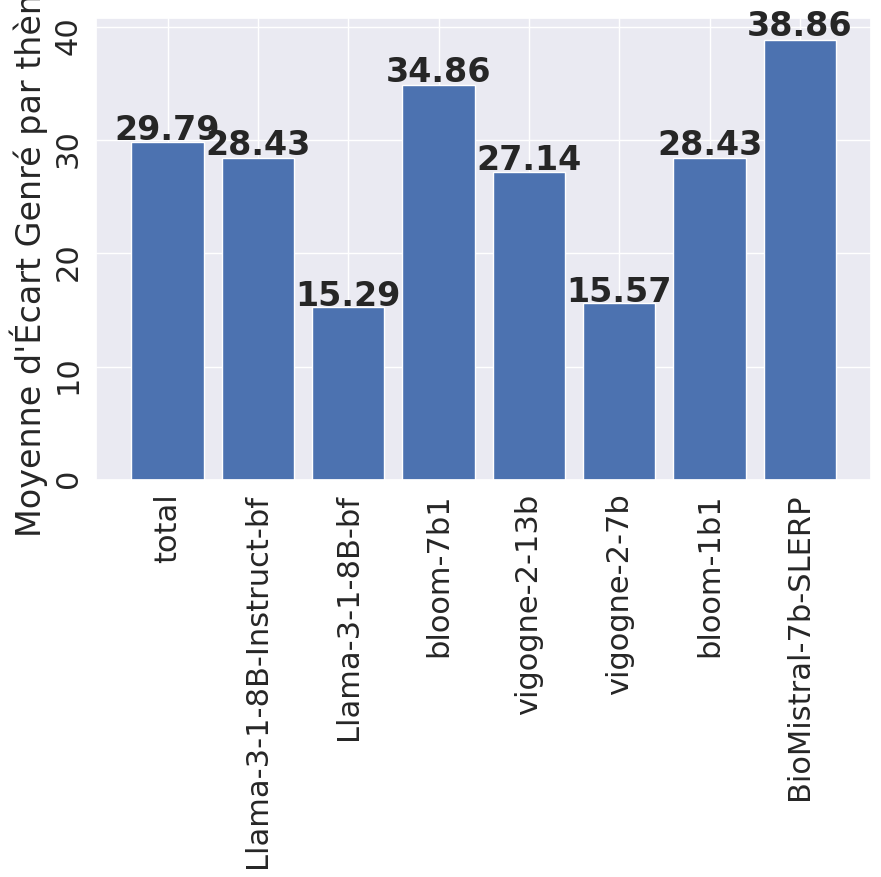

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(means.keys()), list(means.values()))
ax.tick_params(labelrotation=90) 
ax.set_ylabel("Moyenne d'Écart Genré par thème")
#ax.set_title('Problèmes de qualité de données')
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(list(means.values())[i],2),
             ha='center',
             weight='bold')
    i+=1
    
#plt.savefig("fig/moy_gap_topic_model.png")

In [18]:
def viz_per_topic(dataset):
    """Seulement sur thèmes biaisés, sinon trop"""
    topics = list(set(dataset["pathologie"]))
    #topics = biased_topics(all_topics, dataset)[0][:10] + biased_topics(all_topics, dataset)[0][-10:]
    bias = [el[0] for el in all_sorted_gap[:10]] + [el[0] for el in all_sorted_gap[-10:]]
    #print(bias)
    table = []

    for topic in topics:
        op = exploration_donnees_per_topic(dataset,label,topic)
        op['topic'] = topic
        if topic in bias:
            table.append(op)

    print(tabulate(table, headers='keys'))

    #table_new = dic_list_noempty(table)
    table_new = table

    print(table_new)
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)
        
    table_new.insert(0,total)
    #print(table_new)
    
    df = pd.DataFrame(table_new, index=["TOTAL"]+bias)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig("fig/auto_gender_per_topic_10gold.png",bbox_inches = "tight")
    #ax.plot()

viz_per_topic(data_genre)

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
85.7%        11.6%       2.4%         0.3%       infarctus
84.0%        13.7%       1.4%         0.9%       drepanocytose
12.4%        85.3%       2.0%         0.3%       ovaire
10.3%        88.9%       0.9%                    sein
80.6%        16.4%       2.7%         0.3%       vessie
74.0%        24.1%       1.9%                    colon
77.4%        21.3%       1.1%         0.1%       COVID-19
63.3%        34.9%       1.7%         0.1%       depression
64.1%        33.0%       2.7%         0.1%       osteoporose
86.0%        10.7%       2.7%         0.6%       prostate
[{'Masculine': '85.7%', 'Feminine': '11.6%', 'Ambiguous': '2.4%', 'Neutral': '0.3%', 'topic': 'infarctus'}, {'Masculine': '84.0%', 'Feminine': '13.7%', 'Ambiguous': '1.4%', 'Neutral': '0.9%', 'topic': 'drepanocytose'}, {'Feminine': '85.3%', 'Masculine': '12.4%', 'Ambiguous': '2.0%', 'Neutral': '0.3%',

TypeError: unsupported operand type(s) for +: 'int' and 'str'

## Croisement proportions genre par modèle ET par domaine professionnel


 Llama-3-1-8B-Instruct-bf
Masculine    Feminine    Ambiguous    topic
-----------  ----------  -----------  -------------
91.0%        7.0%        2.0%         infarctus
90.0%        8.0%        2.0%         prostate
88.0%        11.0%       1.0%         COVID-19
86.0%        13.0%       1.0%         drepanocytose
81.0%        17.0%       2.0%         vessie
80.0%        19.0%       1.0%         colon
57.0%        40.0%       3.0%         osteoporose
             98.0%       2.0%         sein
8.0%         91.0%       1.0%         ovaire
47.0%        52.0%       1.0%         depression

 Llama-3-1-8B-bf
Masculine    Feminine    Ambiguous    topic          Neutral
-----------  ----------  -----------  -------------  ---------
84.0%        14.0%       2.0%         infarctus
81.0%        13.0%       6.0%         prostate
73.0%        22.0%       5.0%         vessie
70.0%        27.0%       3.0%         drepanocytose
66.0%        32.0%       1.0%         COVID-19       1.0%
60.0%        37

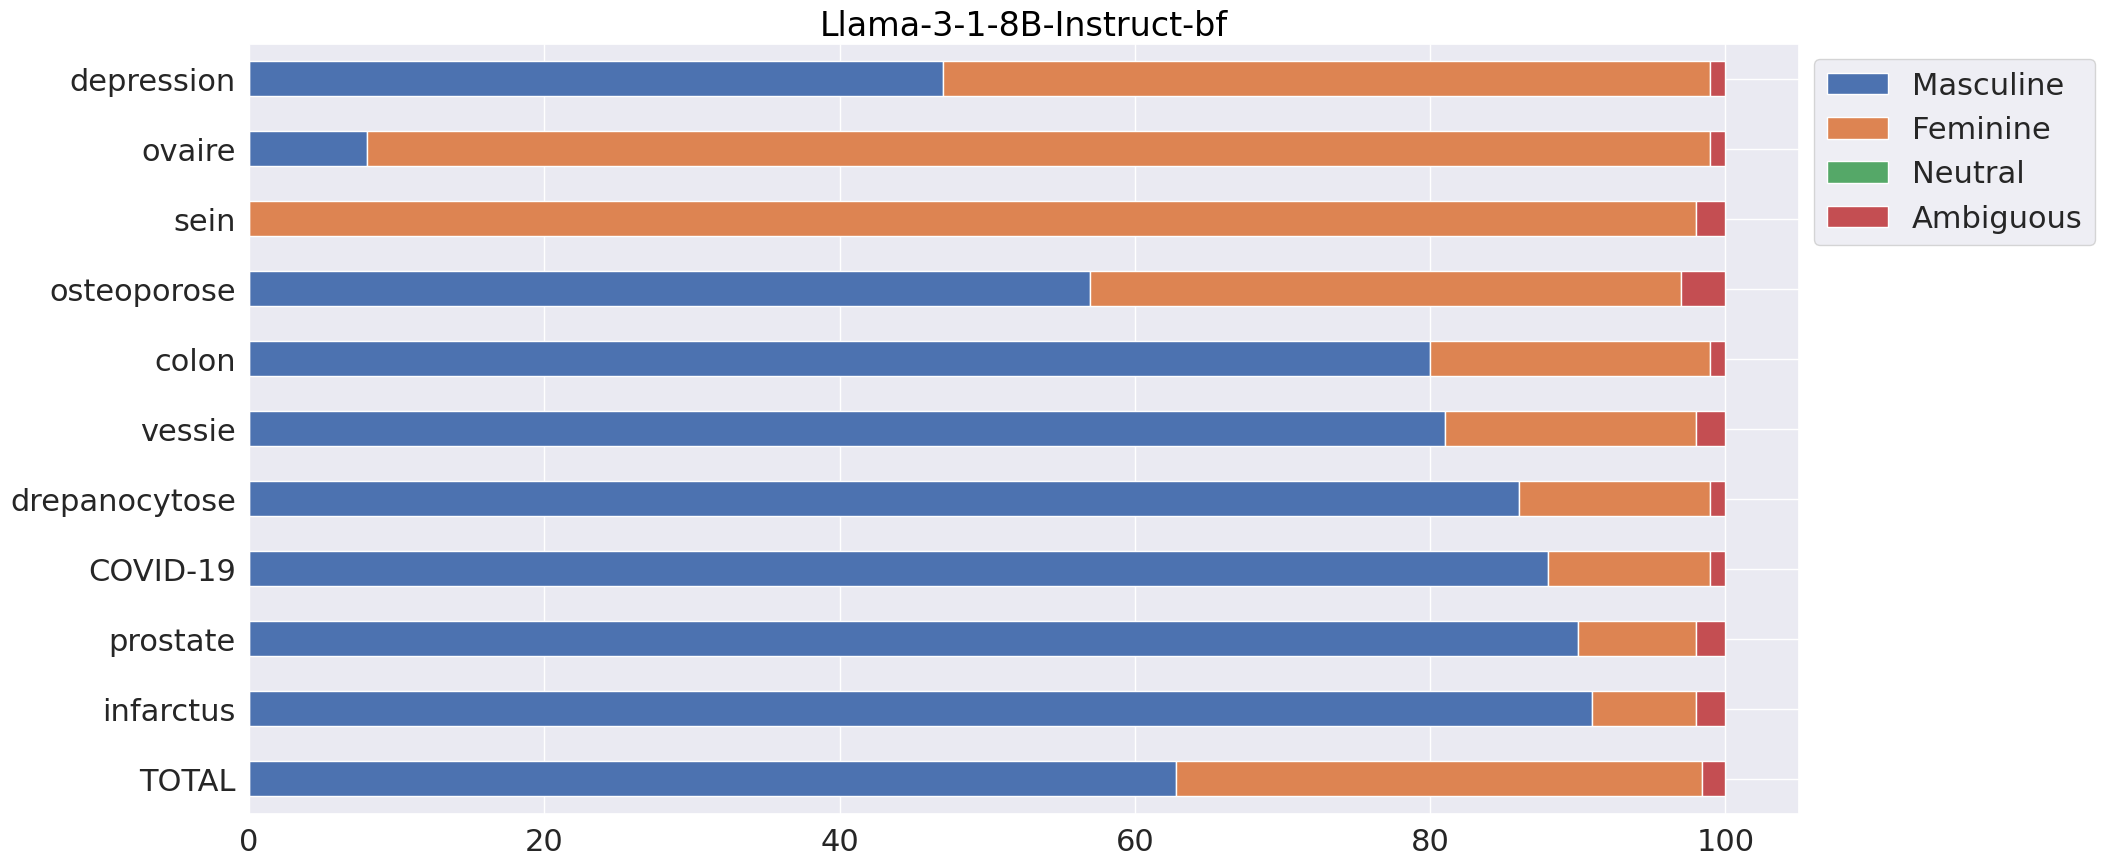

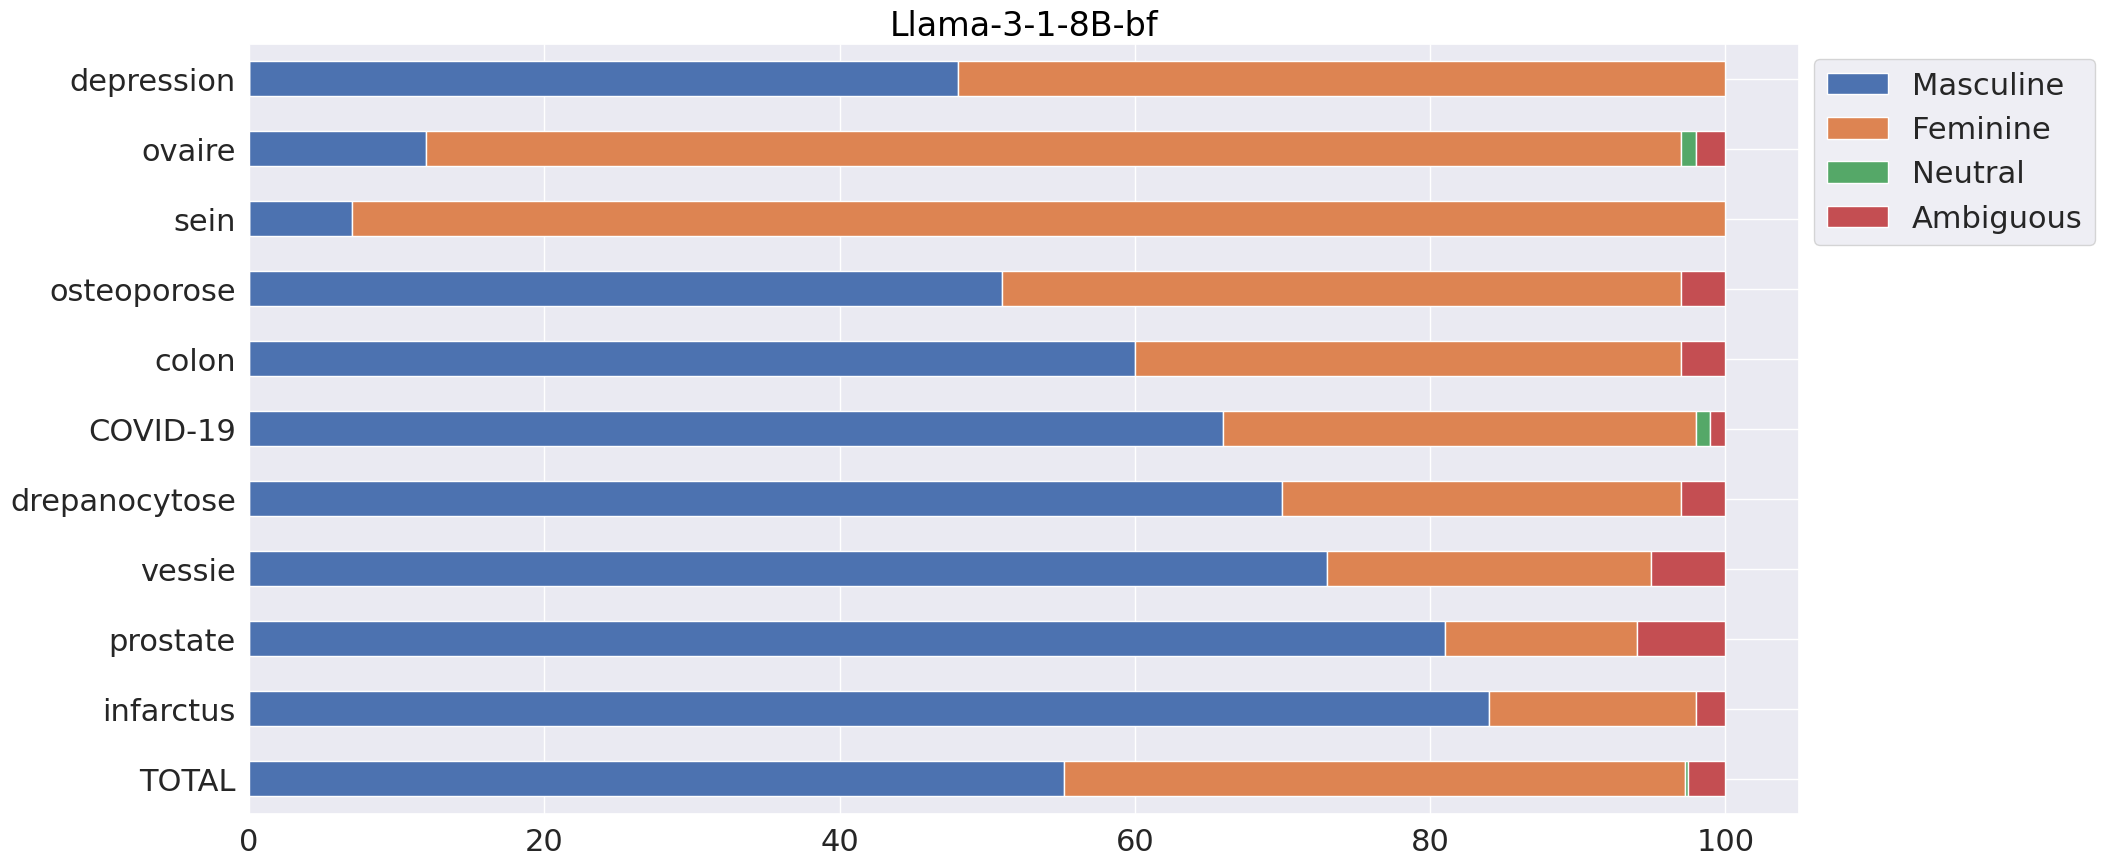

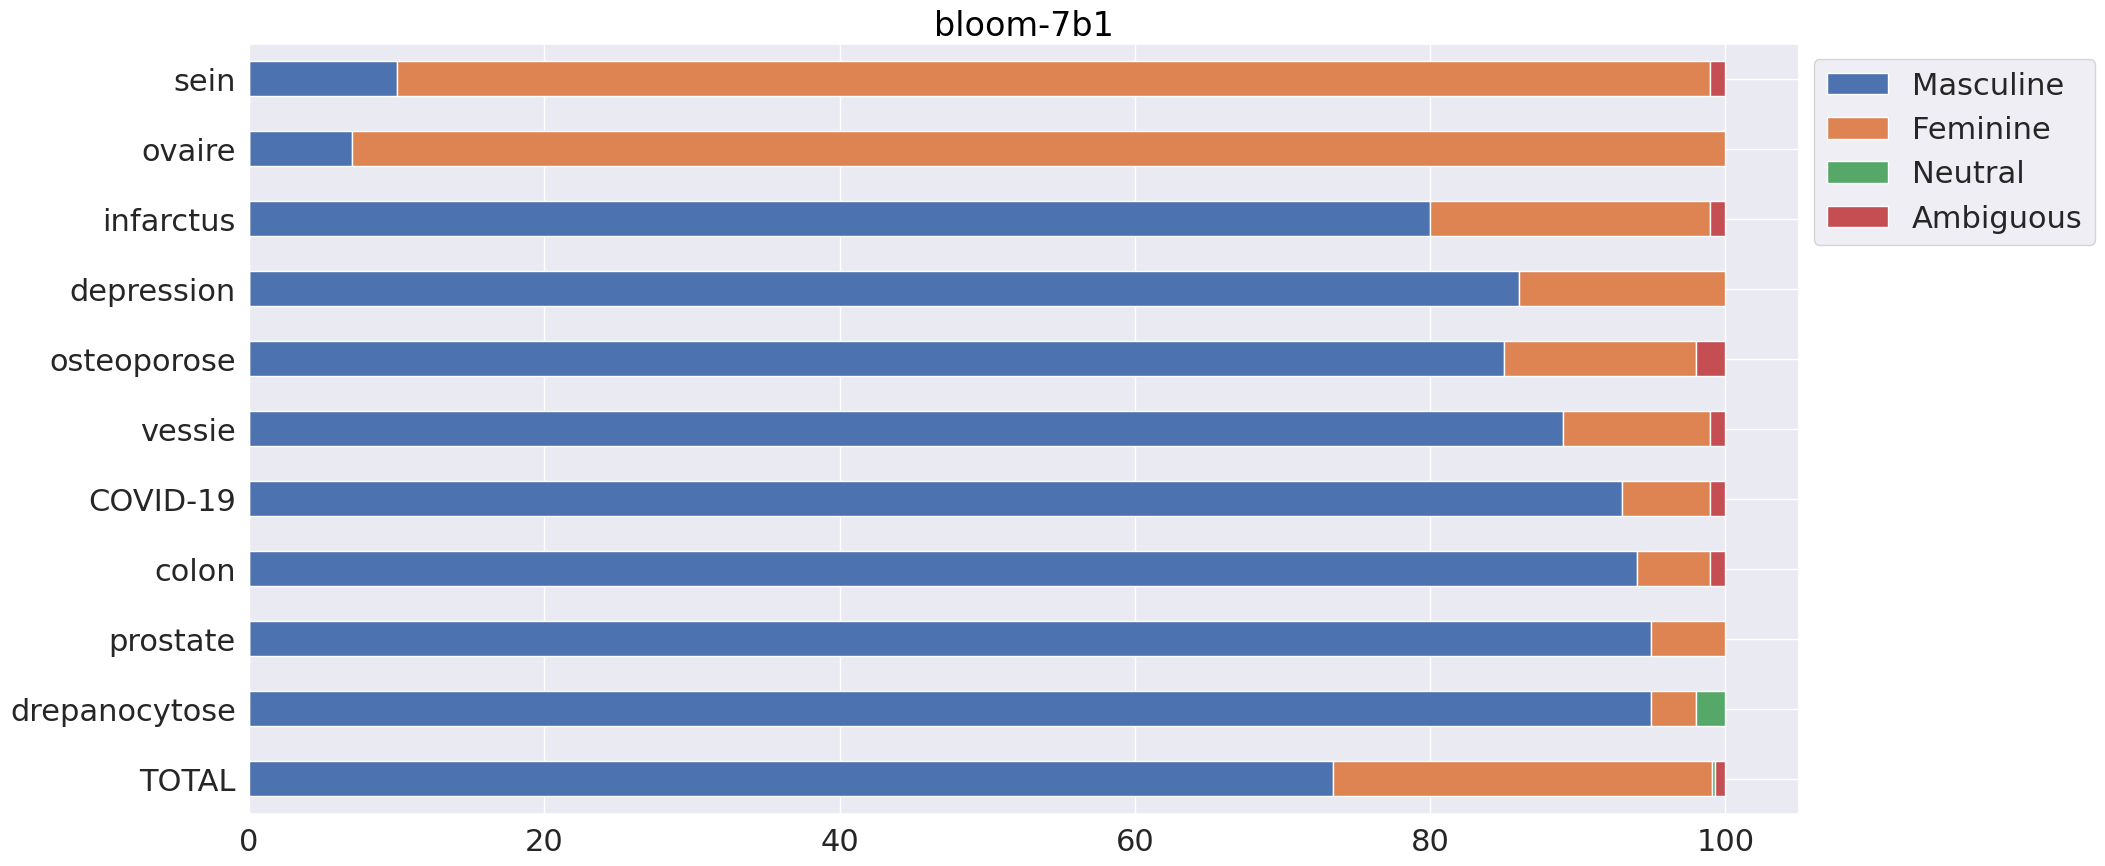

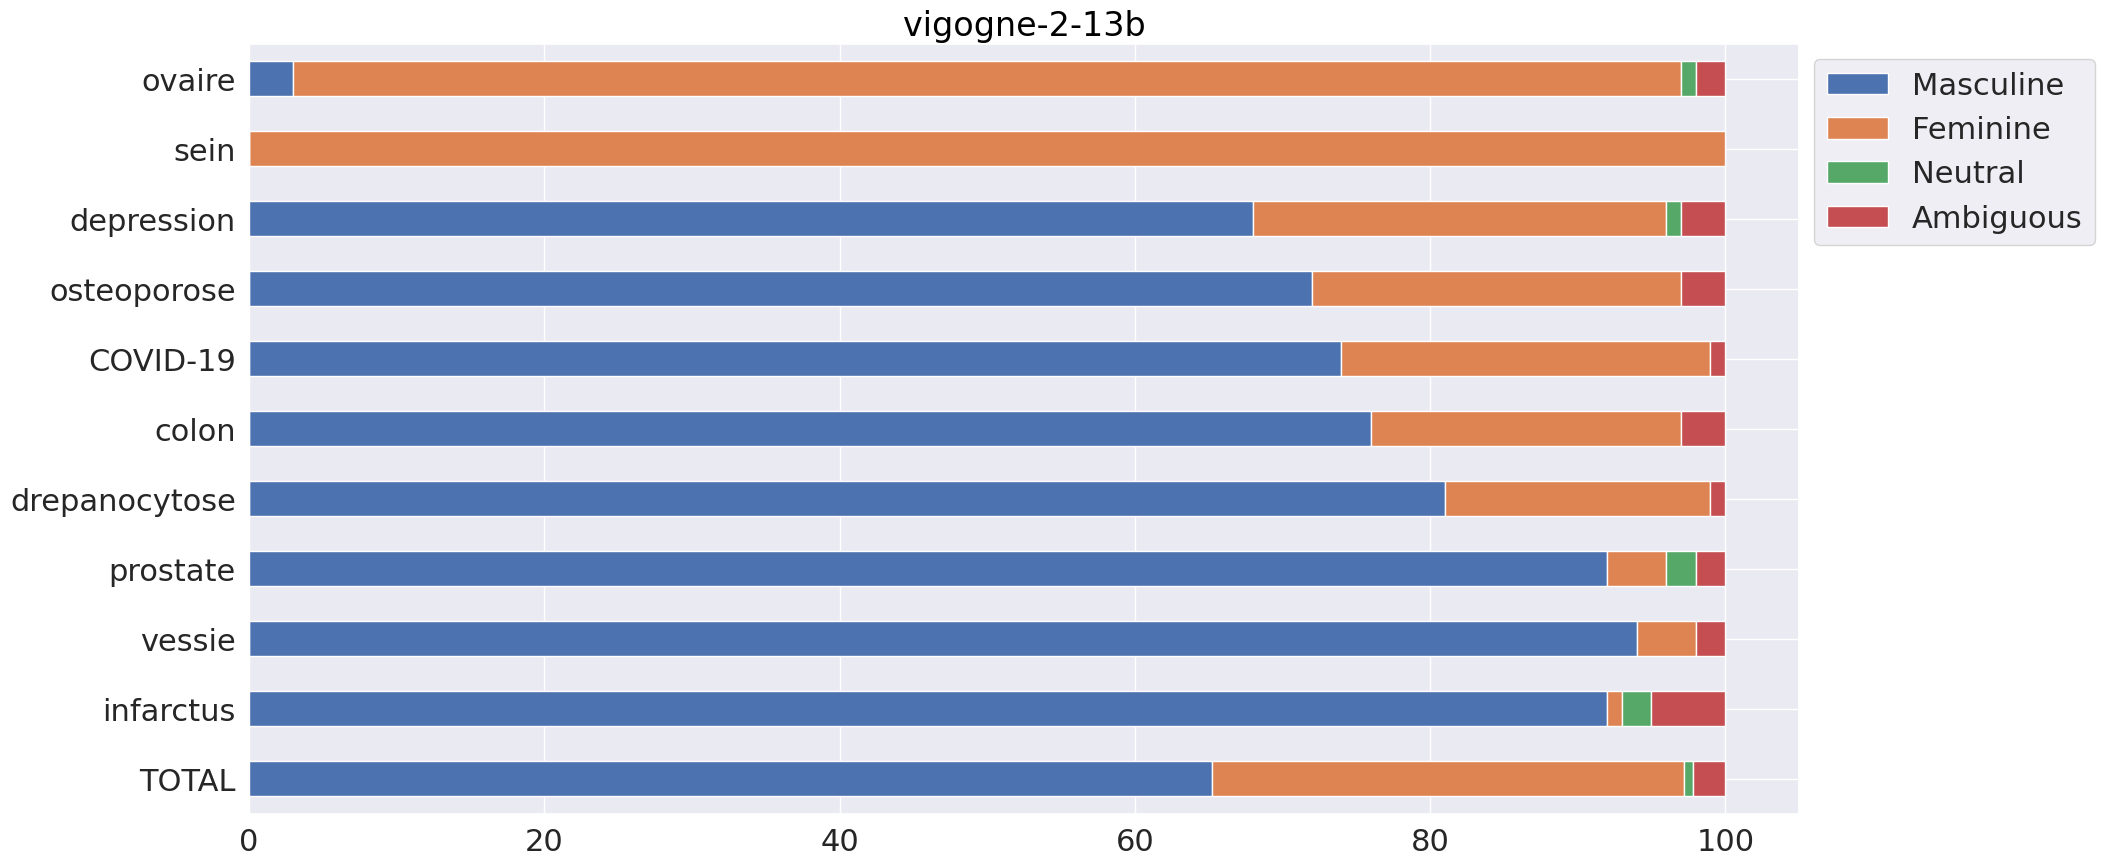

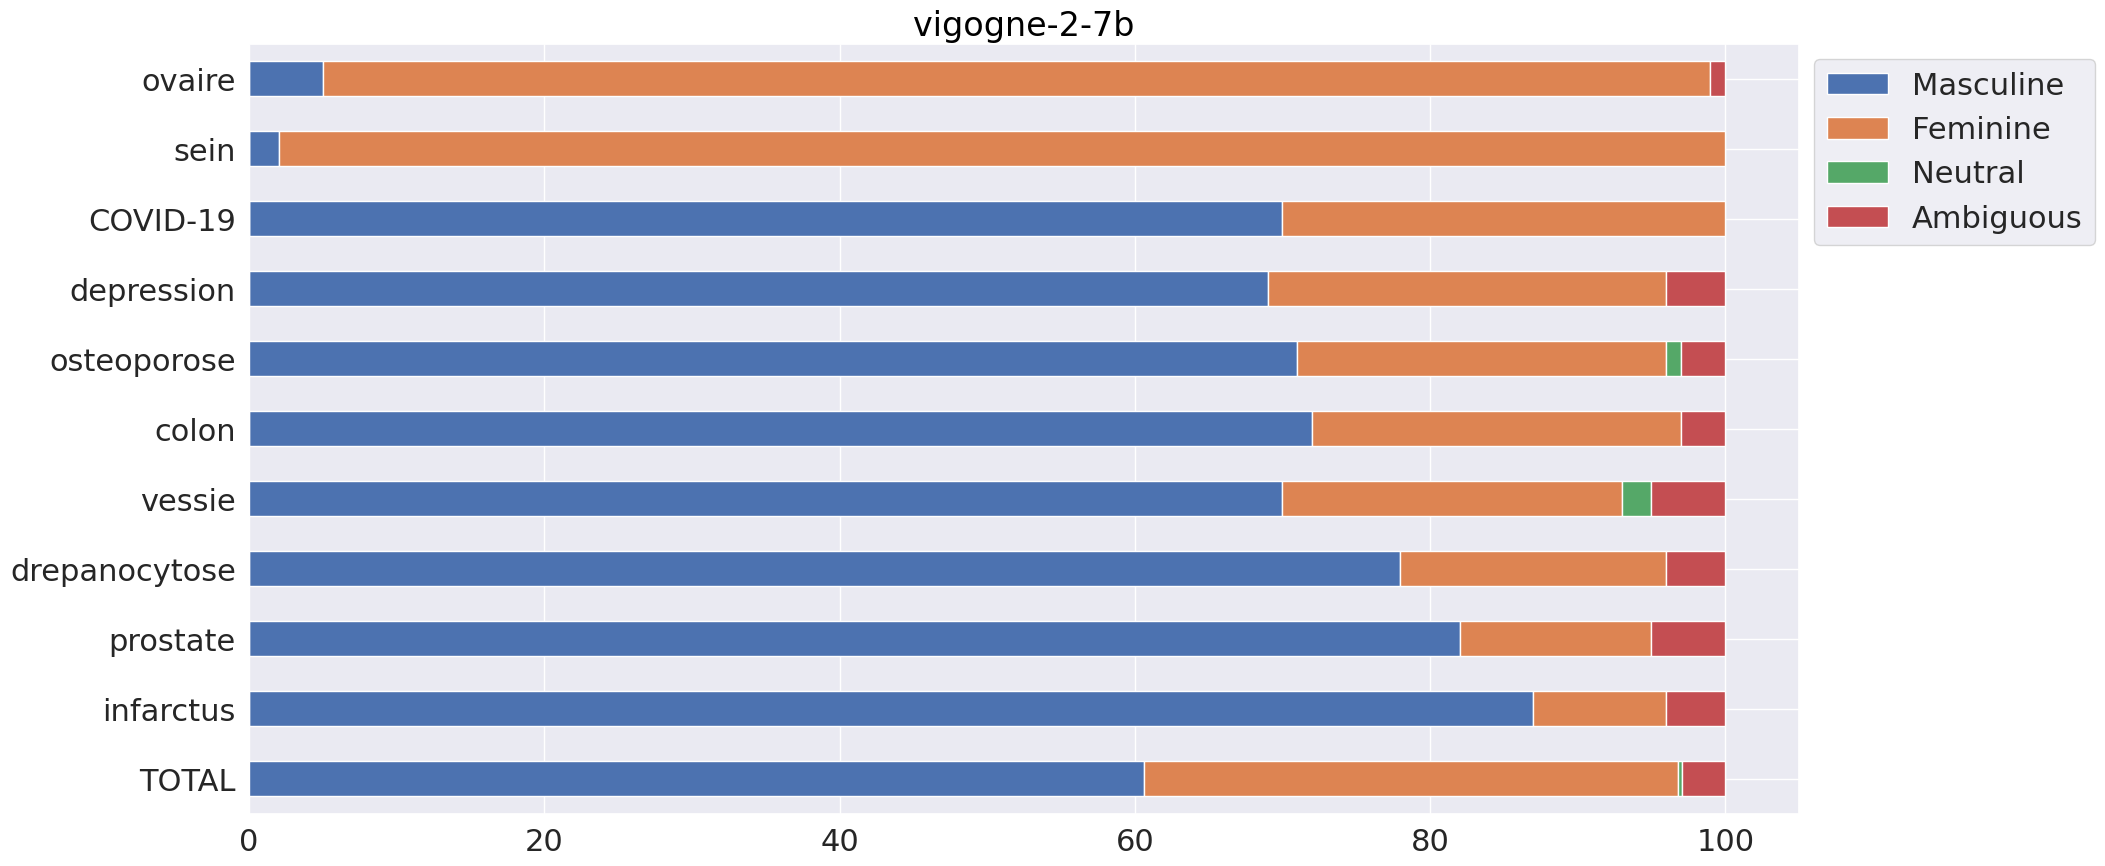

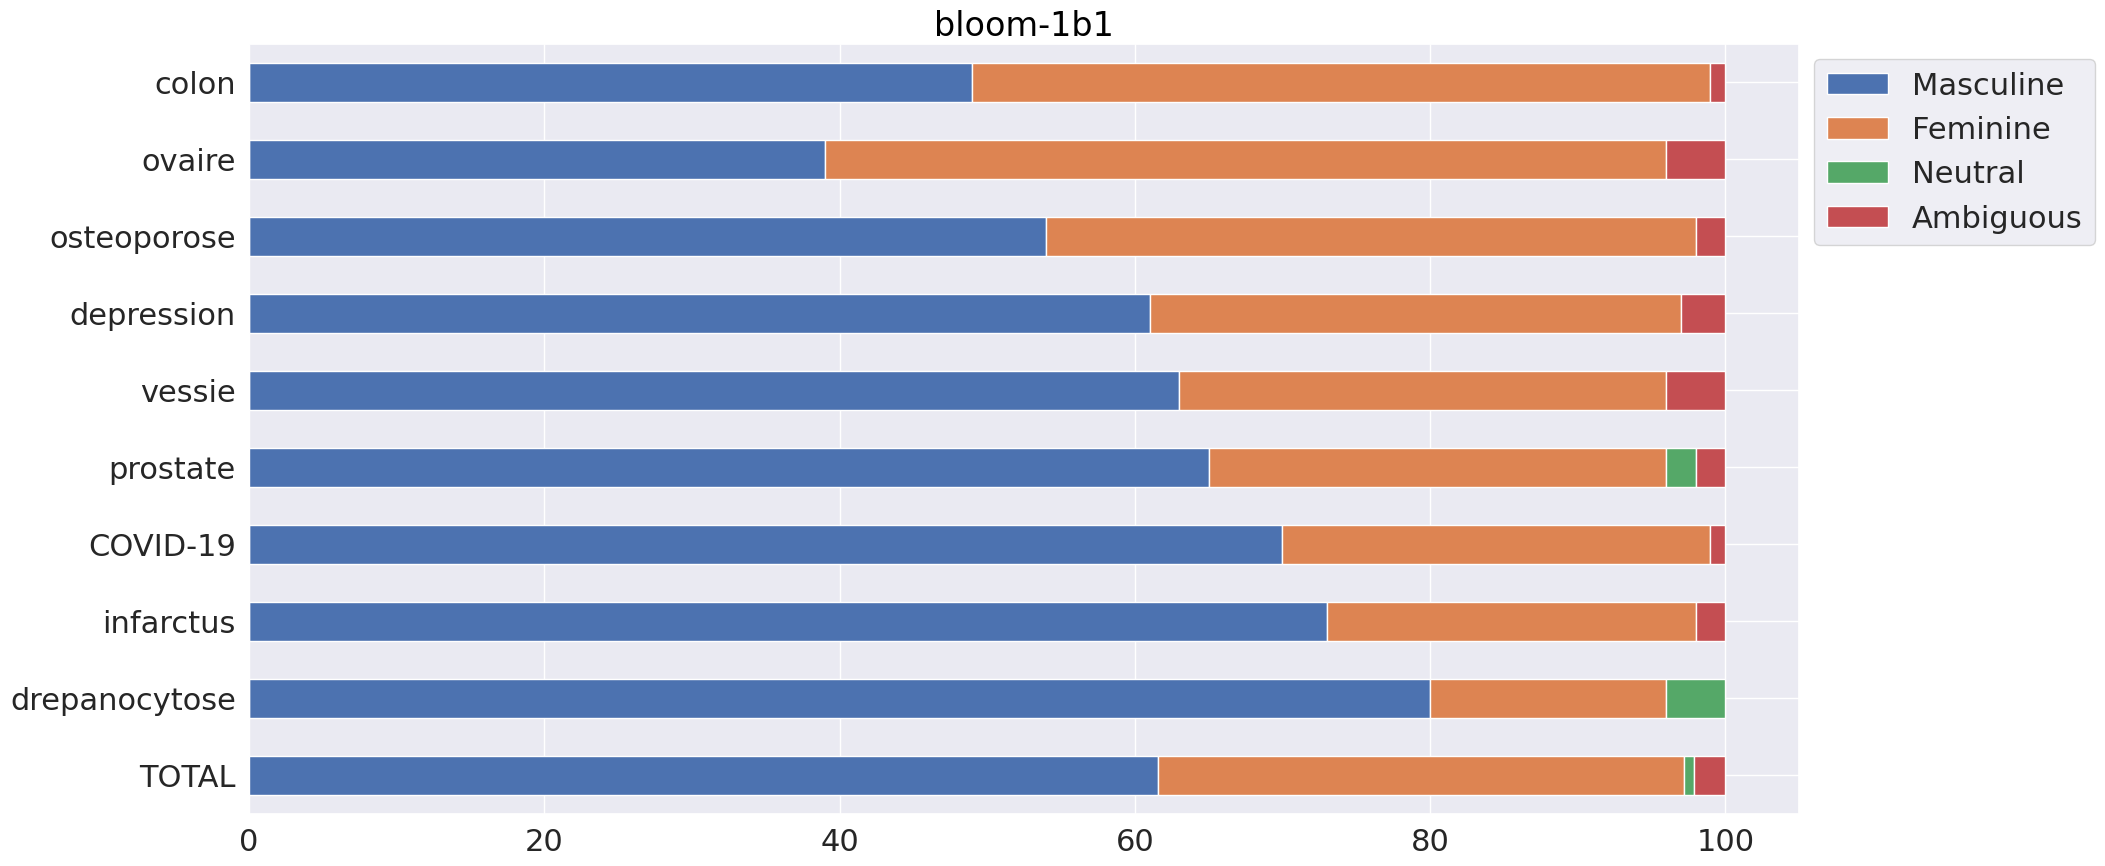

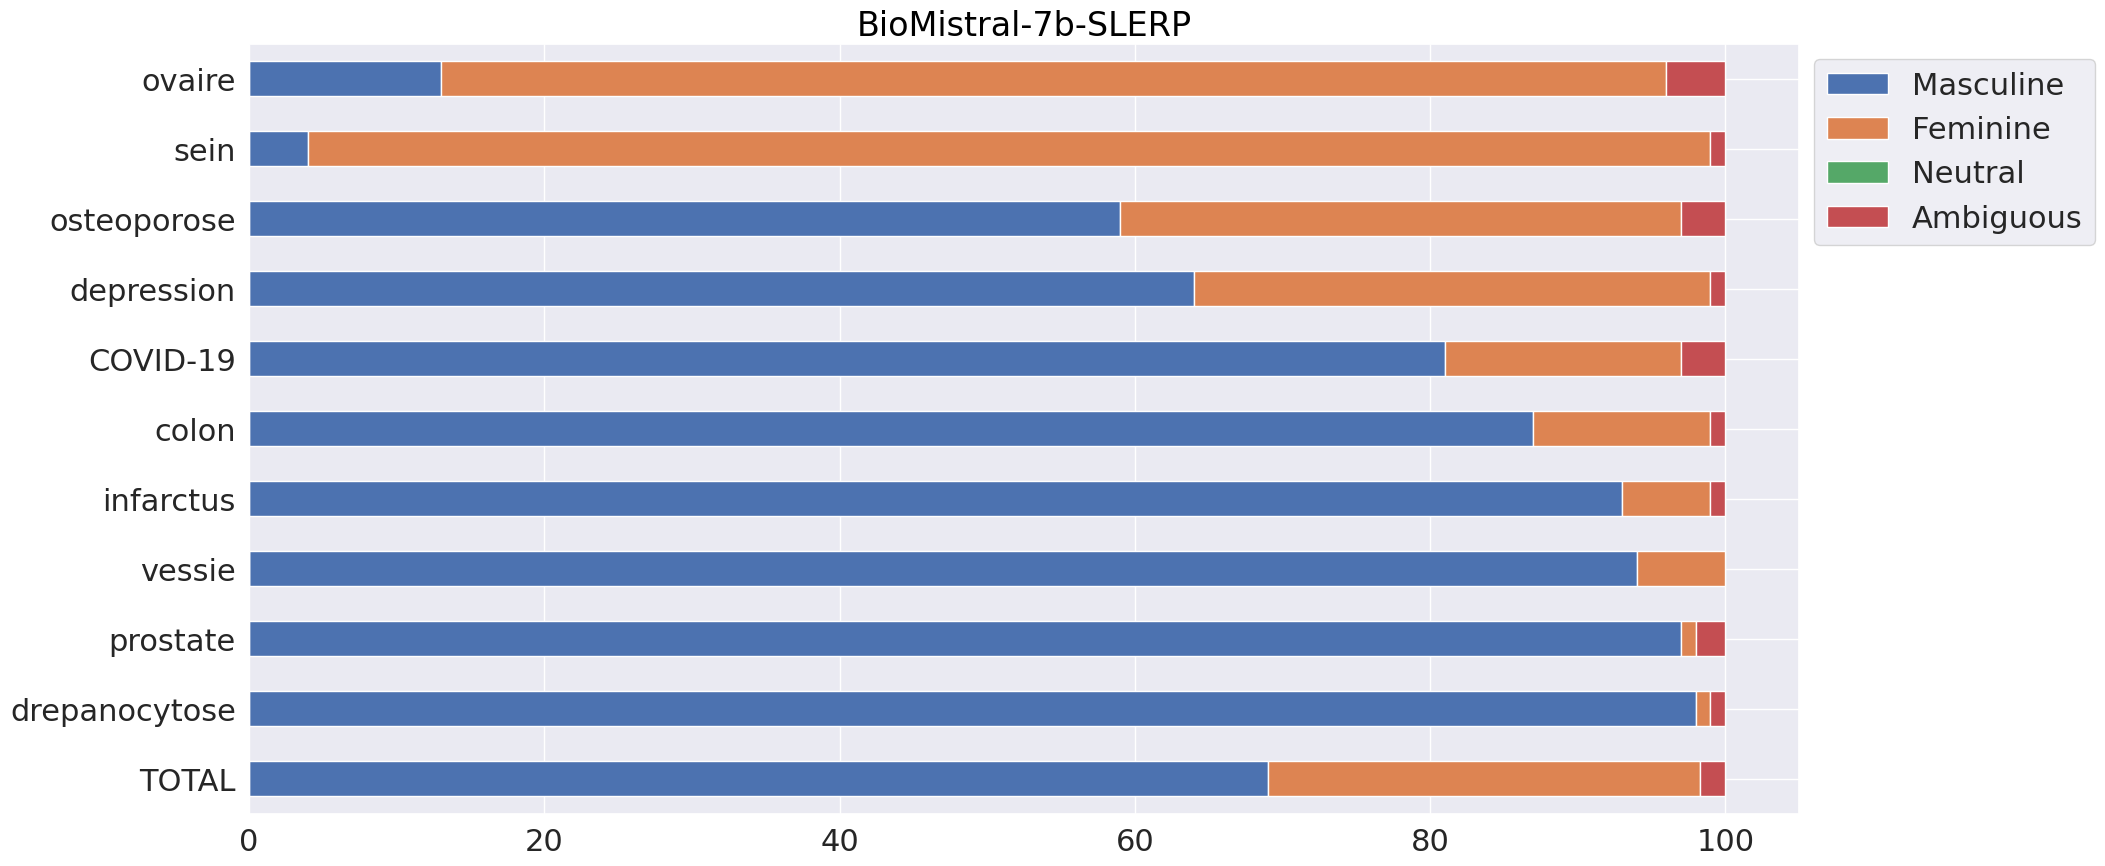

In [19]:
import warnings
def exploration_donnees_per_topic_model(dataset, golden_gender,model, topic ,savecsv=False, savefig = False):
    
    dataset = dataset[dataset["pathologie"] == topic]
    dataset = dataset[dataset["model"] == model]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {model}, {topic}\n"
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{model}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

all_topics = list(set(data_genre["pathologie"]))
topic_mod = {}

"""Ordre par modèle, puis par topic"""
for model in modeles:
    table = []
    sorted_gap, masc_gap, fem_gap = biased_topics(all_topics,data_genre[data_genre["model"] == model])
    #topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]
    topics = [el[0] for el in masc_gap]+[el[0] for el in fem_gap]
    topic_mod[model]=topics
    for topic in topics:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['topic'] = topic
        table.append(op)

    print("\n",model)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    #table_new.append(total)
    table_new.insert(0,total)

        
    df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(model,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"fig/auto_gender_per_model+topic_{model}.png",bbox_inches = "tight")
    ax.plot()


 drepanocytose
Masculine    Feminine    Ambiguous    model                     Neutral
-----------  ----------  -----------  ------------------------  ---------
86.0%        13.0%       1.0%         Llama-3-1-8B-Instruct-bf
70.0%        27.0%       3.0%         Llama-3-1-8B-bf
95.0%        3.0%                     bloom-7b1                 2.0%
81.0%        18.0%       1.0%         vigogne-2-13b
78.0%        18.0%       4.0%         vigogne-2-7b
80.0%        16.0%                    bloom-1b1                 4.0%
98.0%        1.0%        1.0%         BioMistral-7b-SLERP

 prostate
Masculine    Feminine    Ambiguous    model                     Neutral
-----------  ----------  -----------  ------------------------  ---------
90.0%        8.0%        2.0%         Llama-3-1-8B-Instruct-bf
81.0%        13.0%       6.0%         Llama-3-1-8B-bf
95.0%        5.0%                     bloom-7b1
92.0%        4.0%        2.0%         vigogne-2-13b             2.0%
82.0%        13.0%       5.0%  

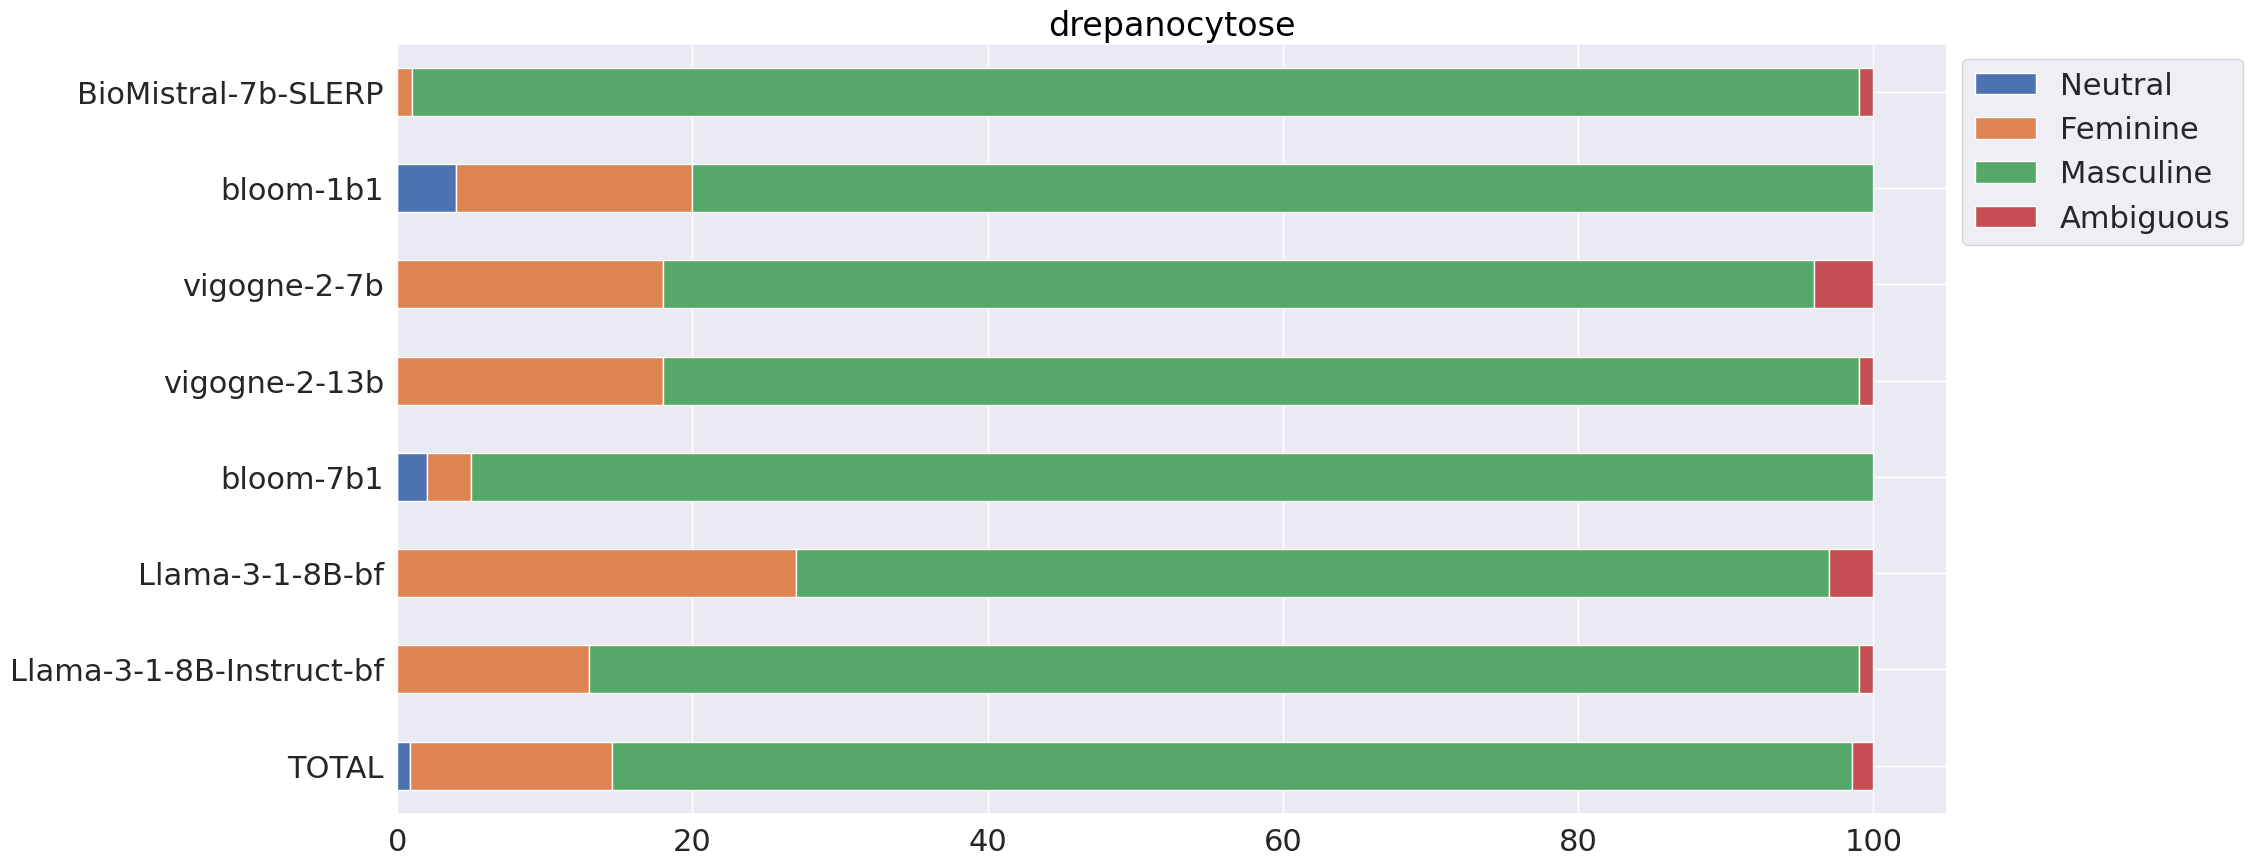

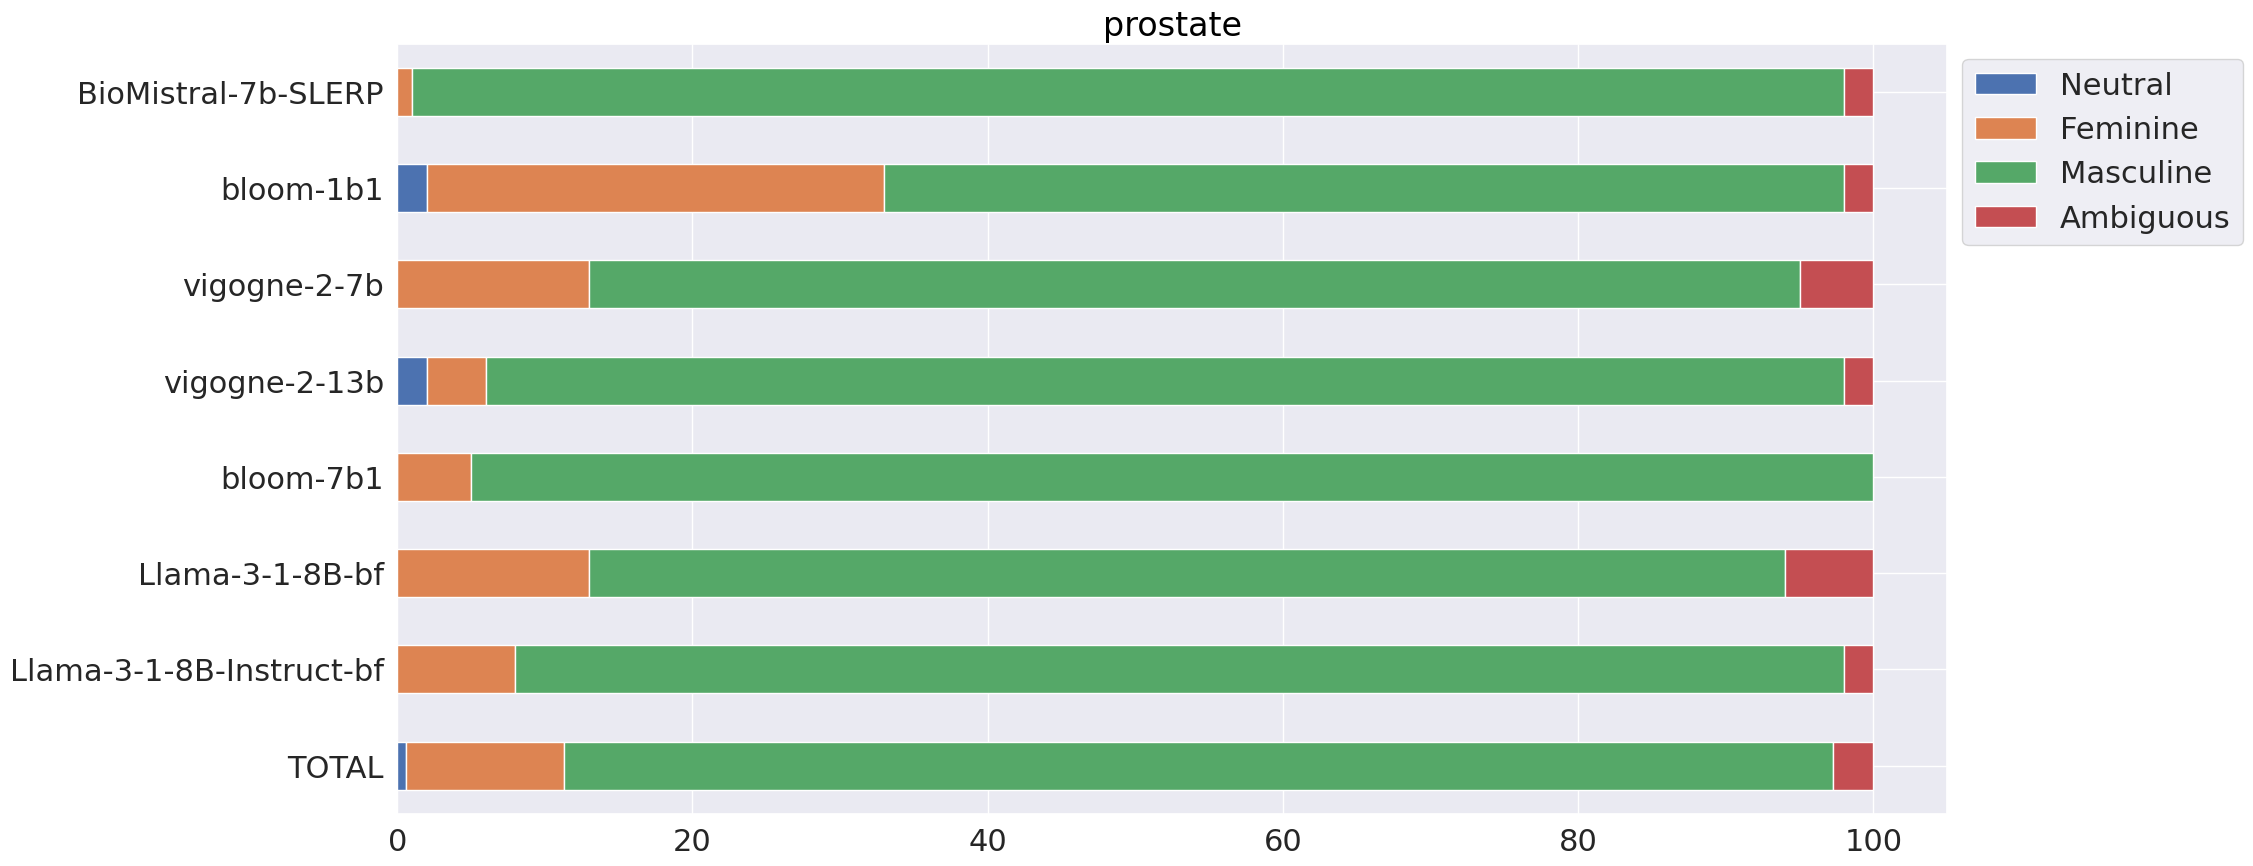

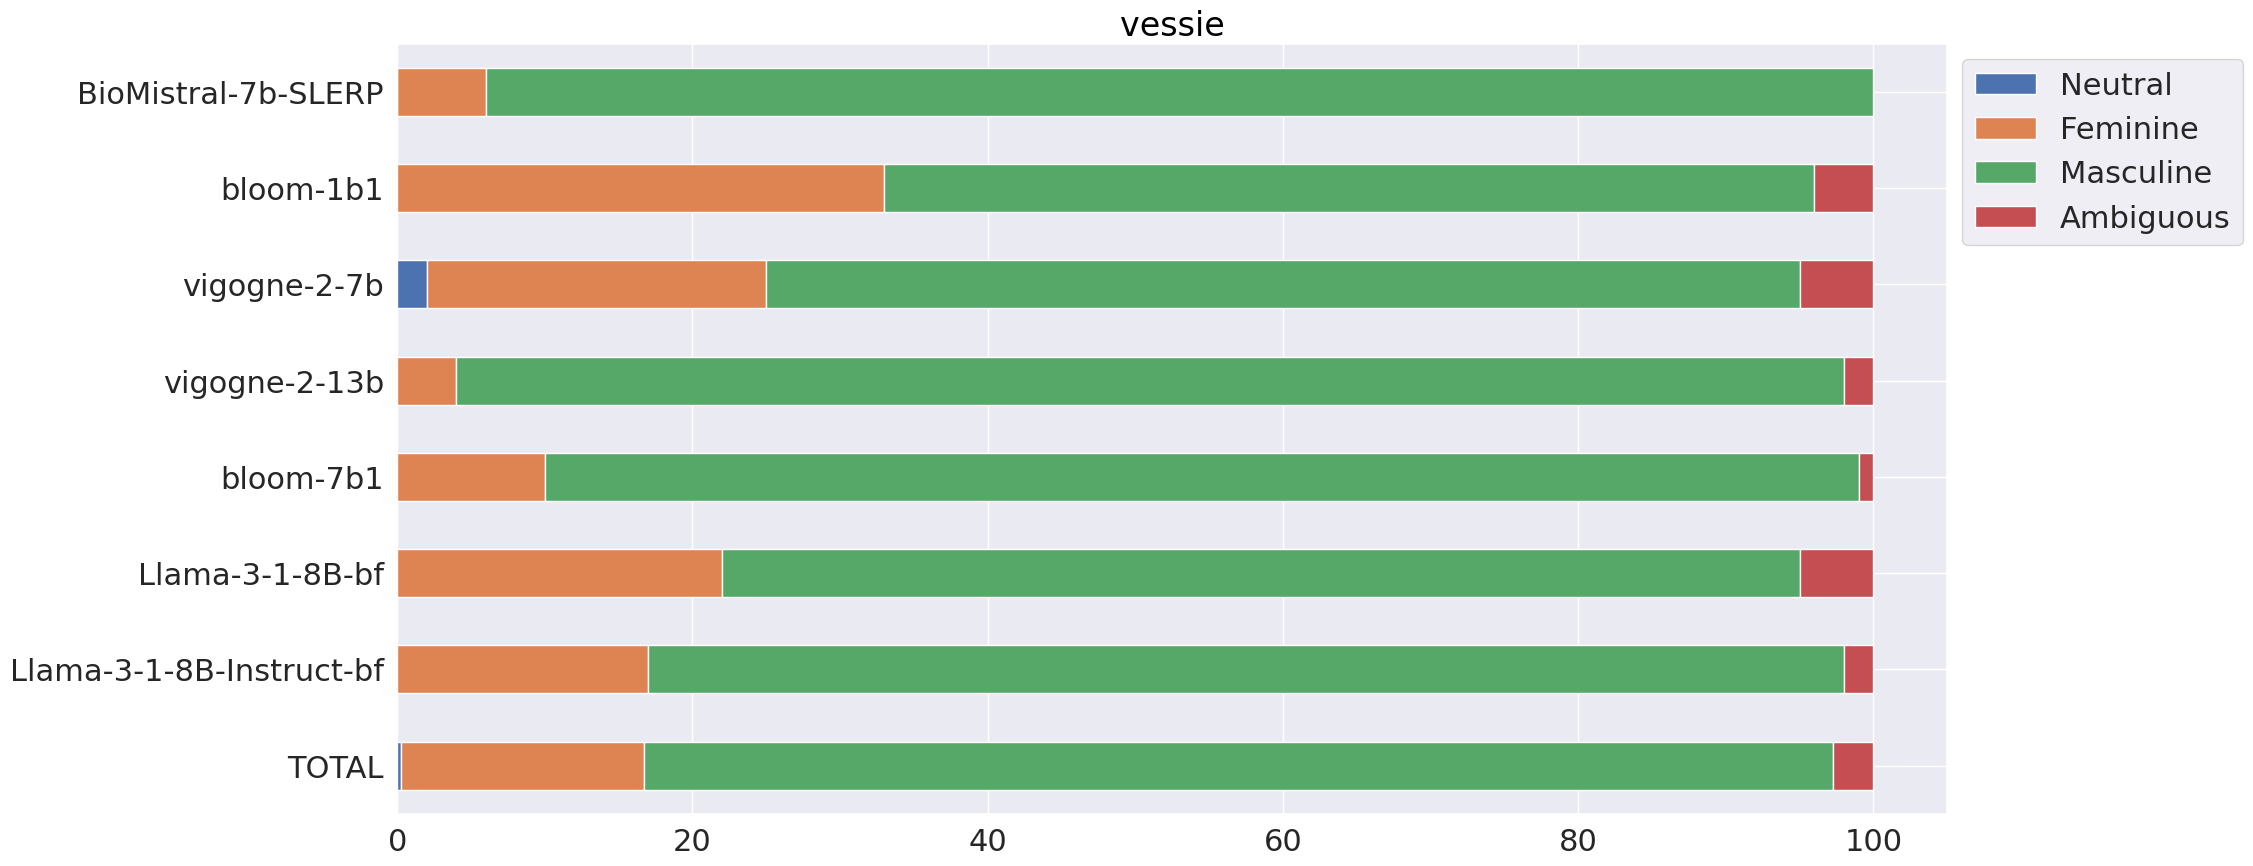

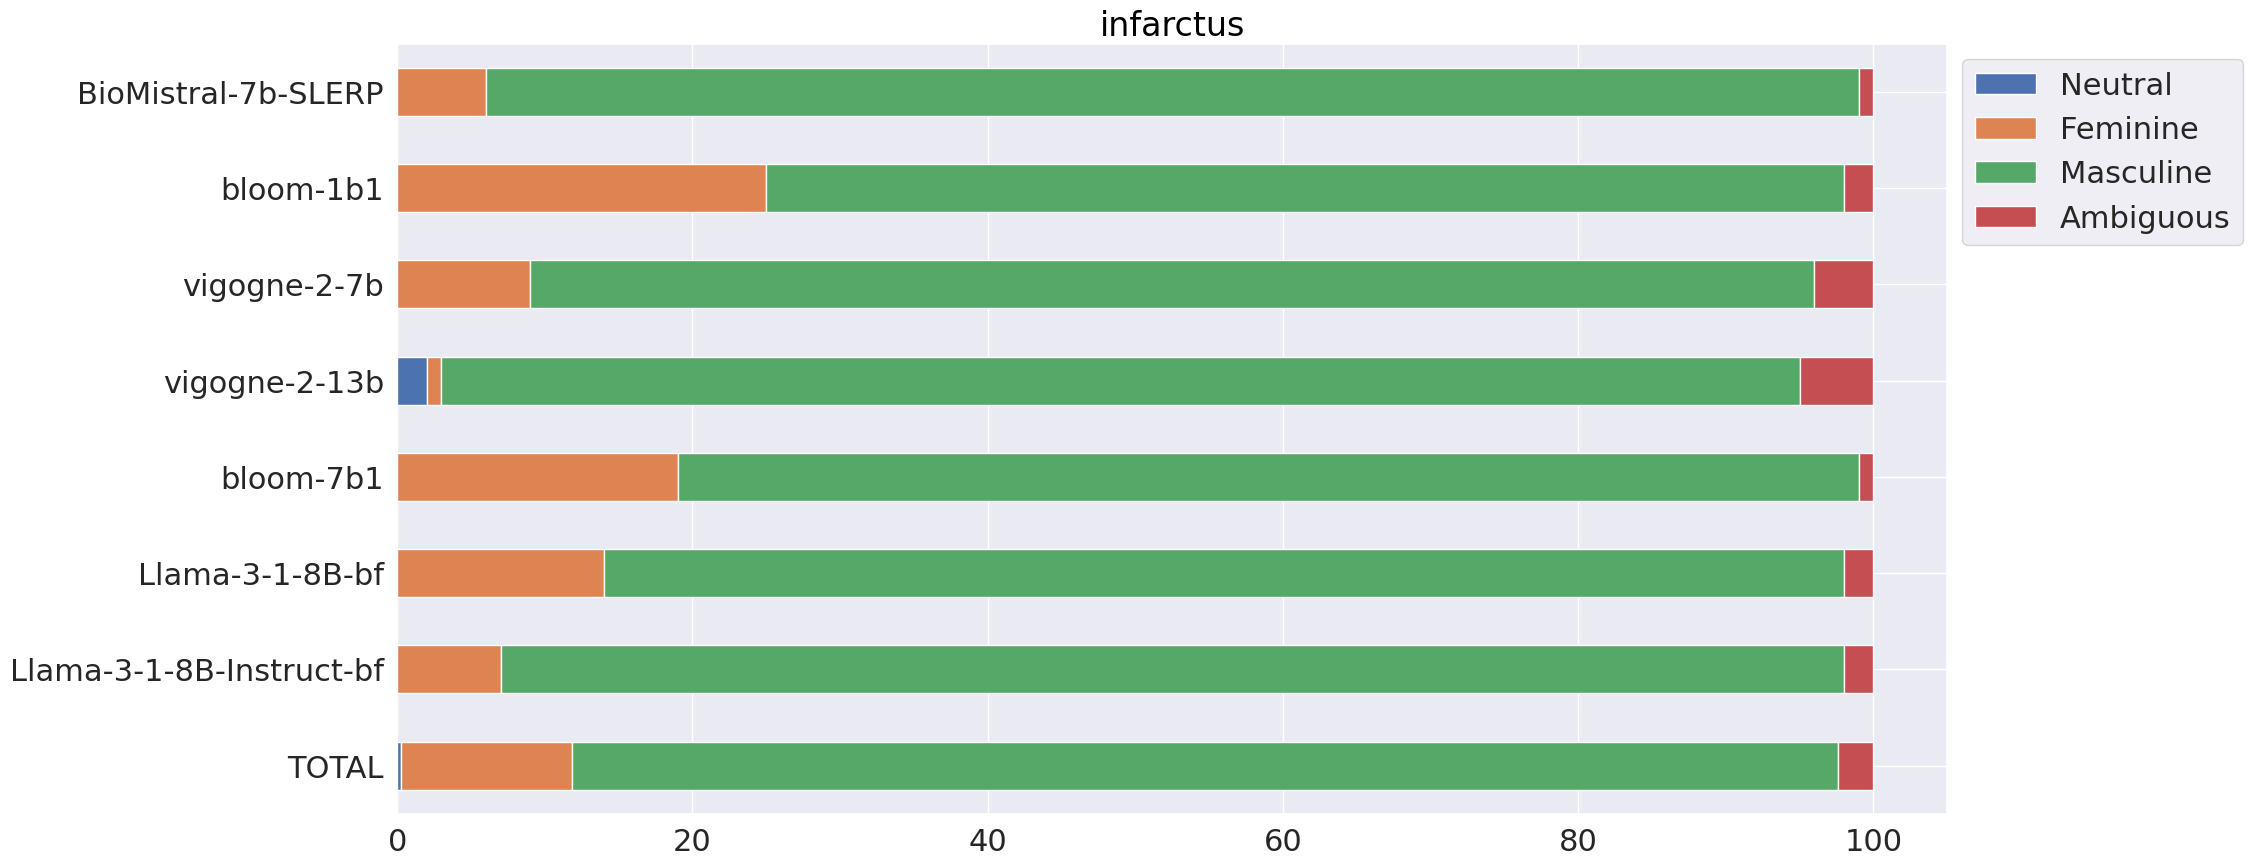

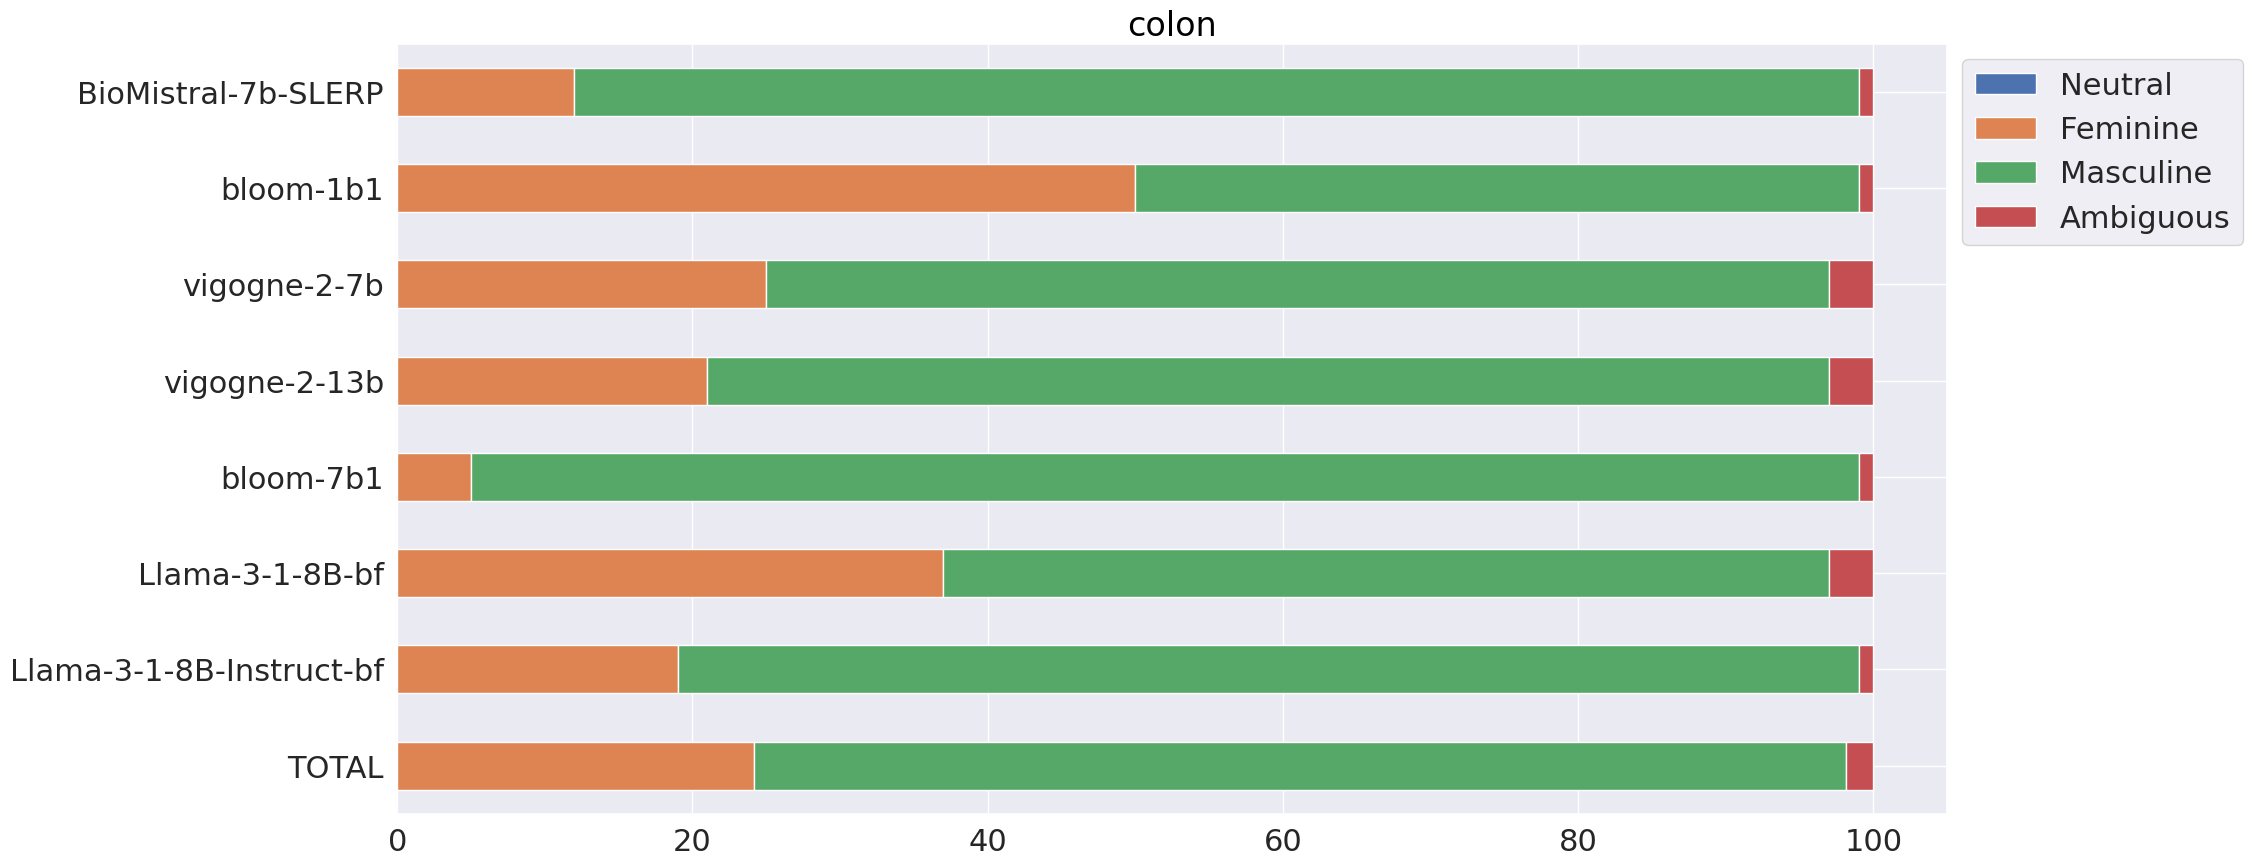

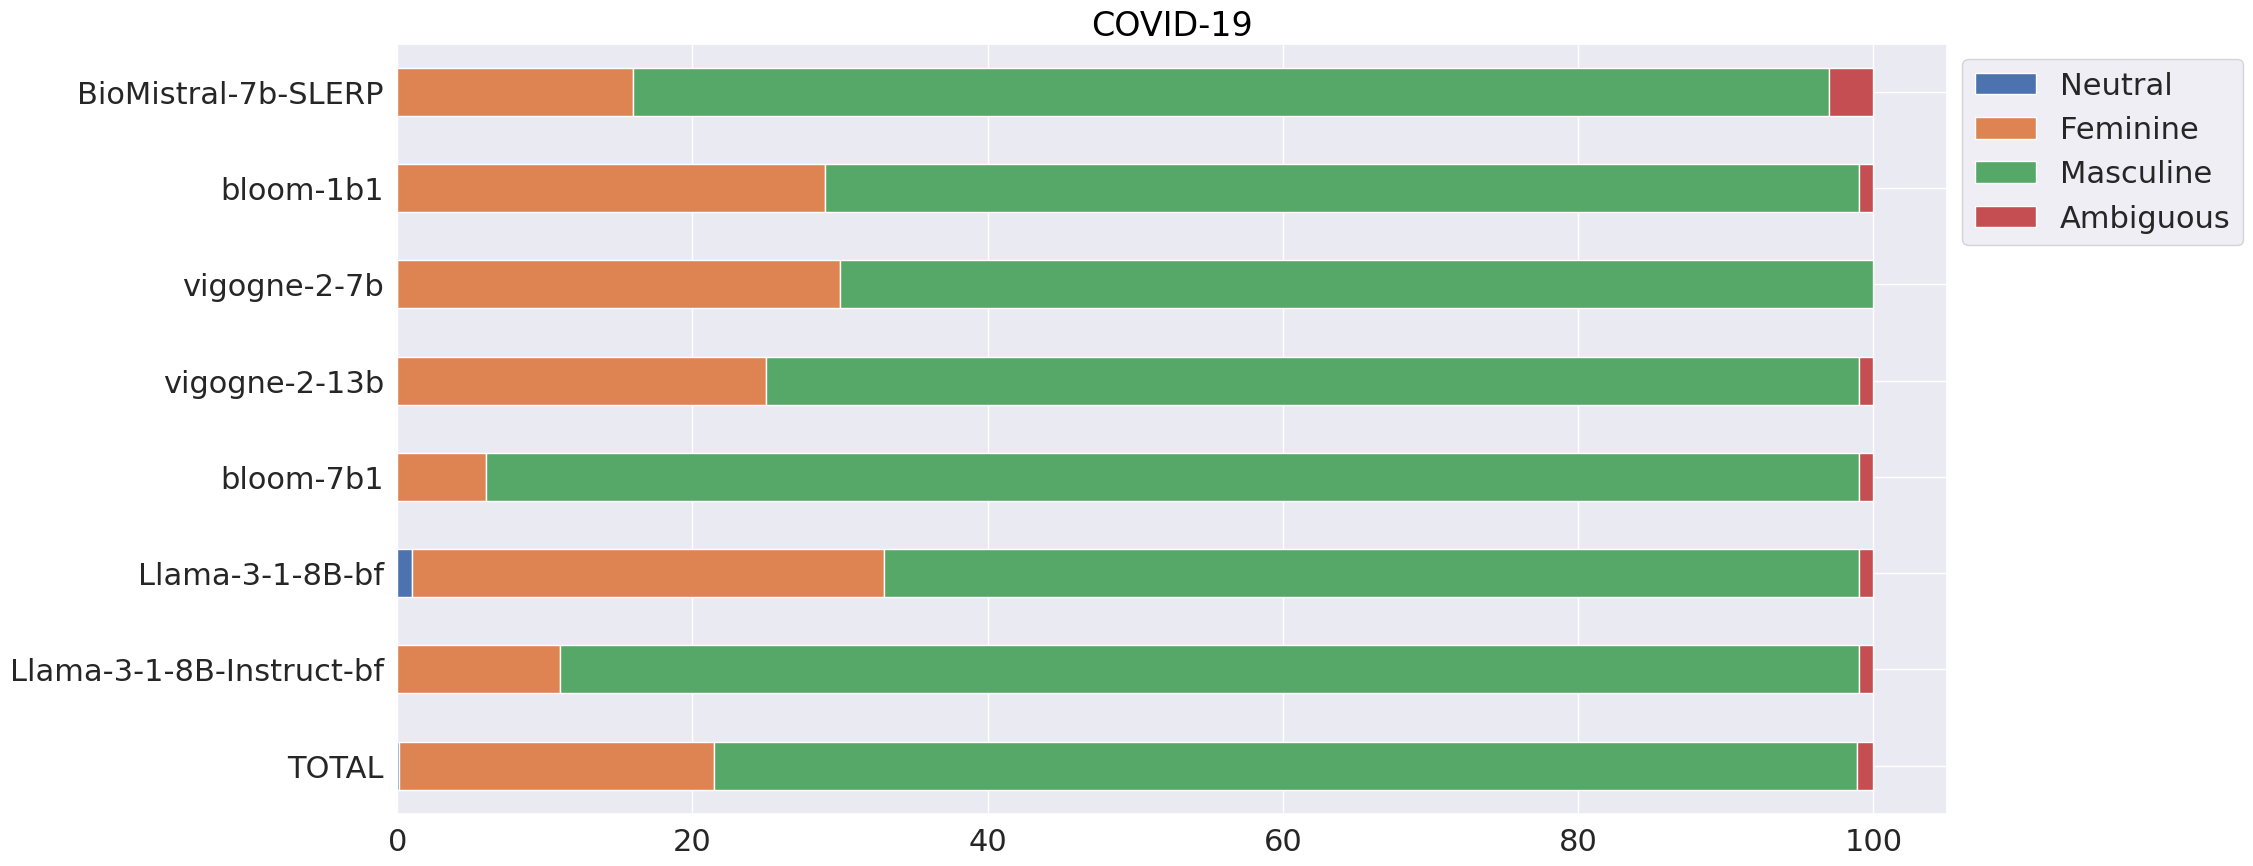

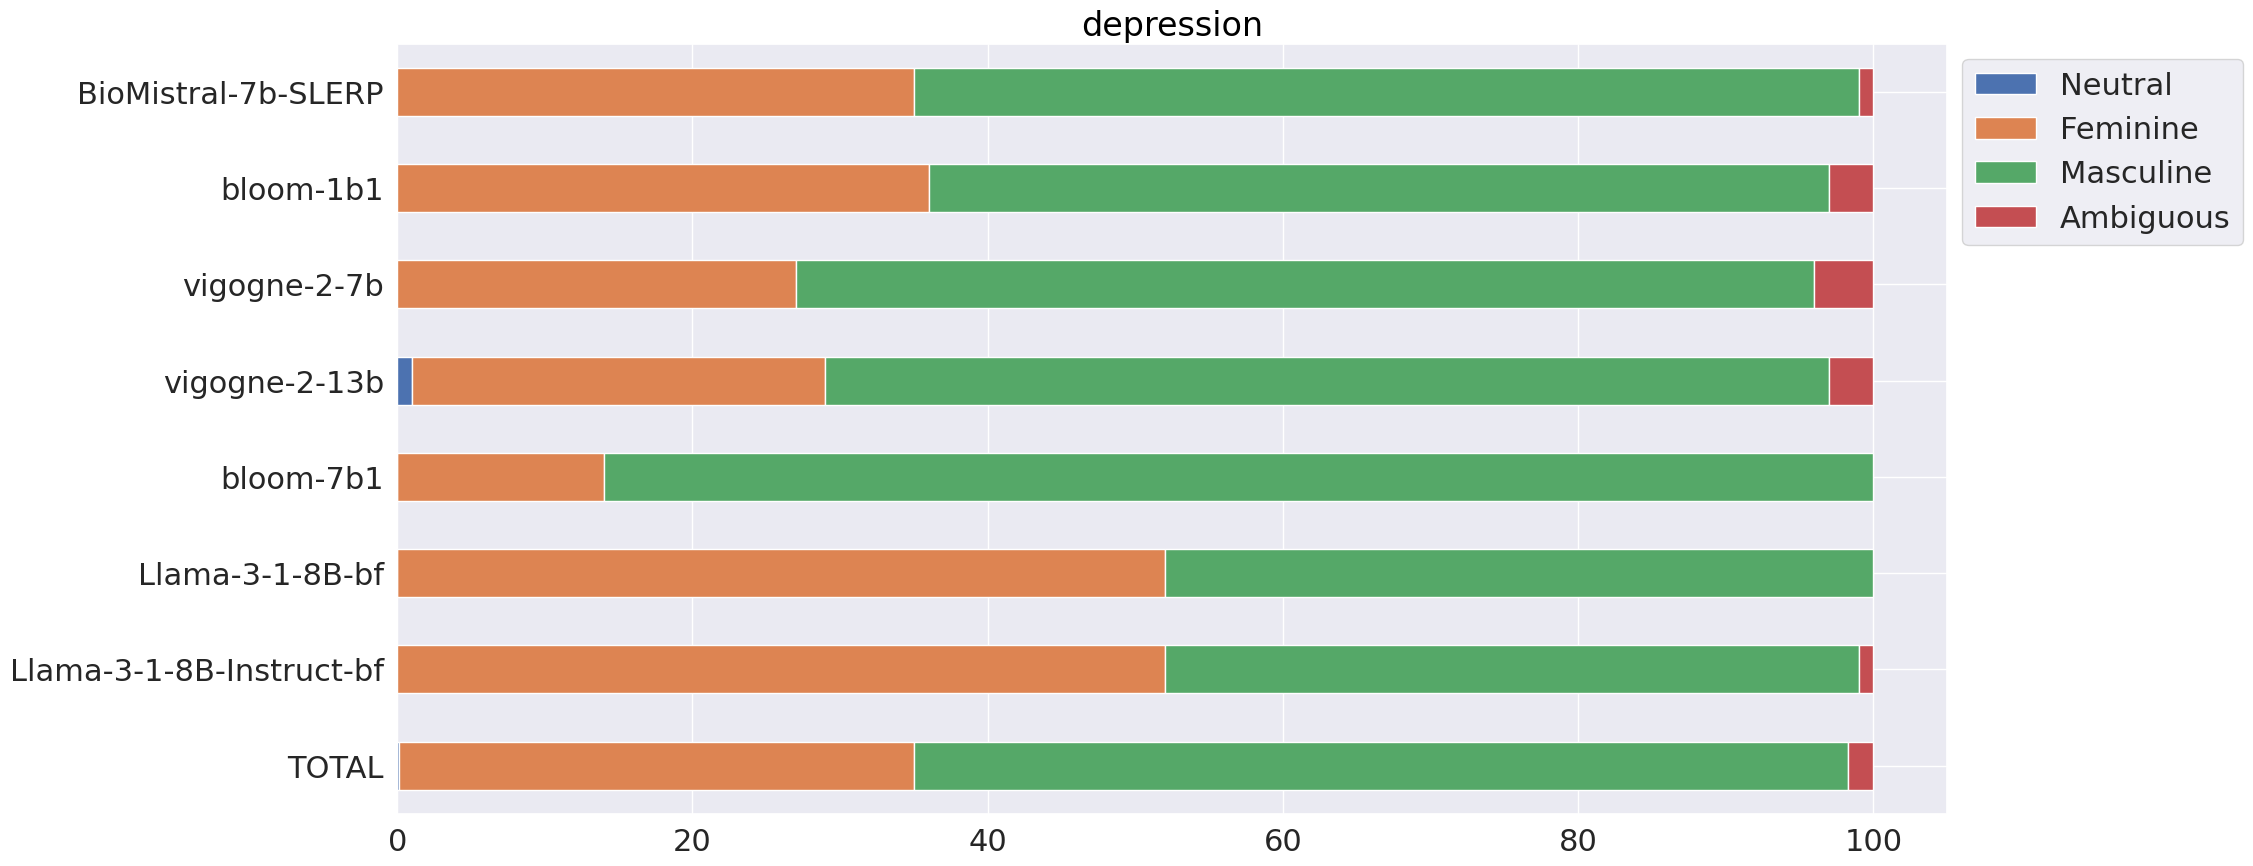

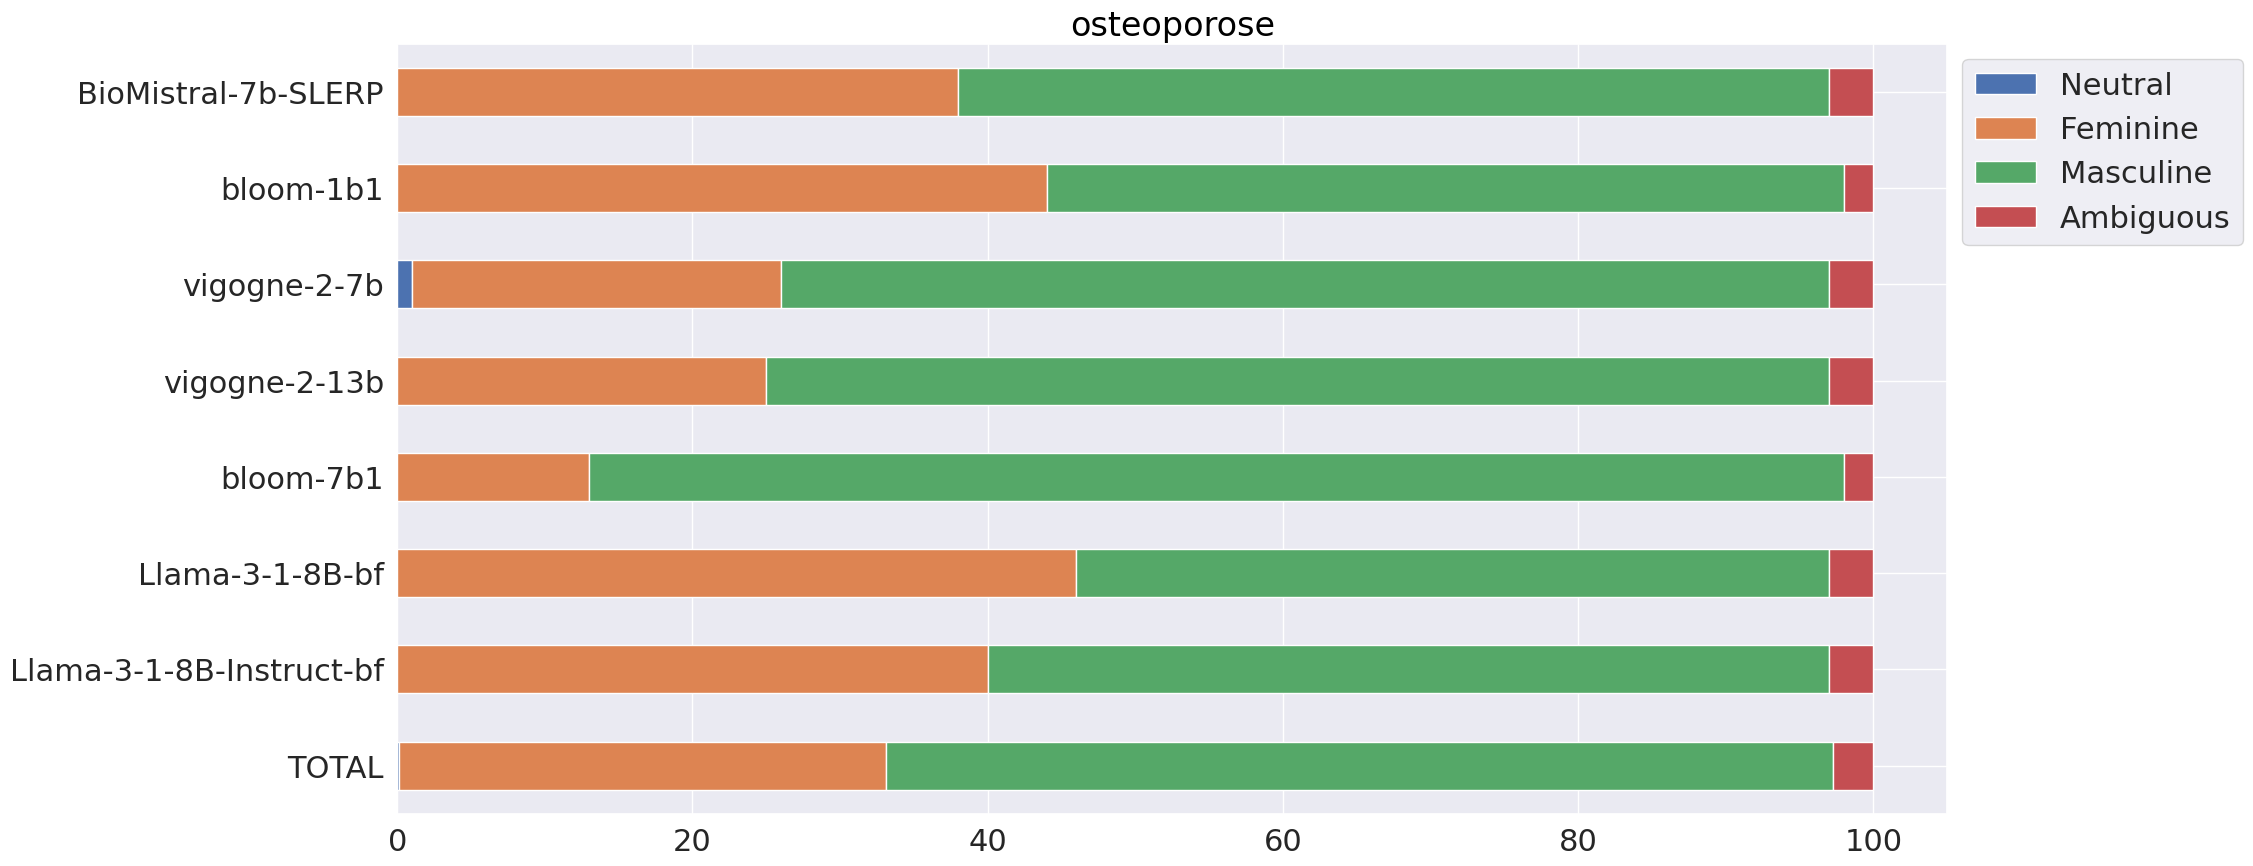

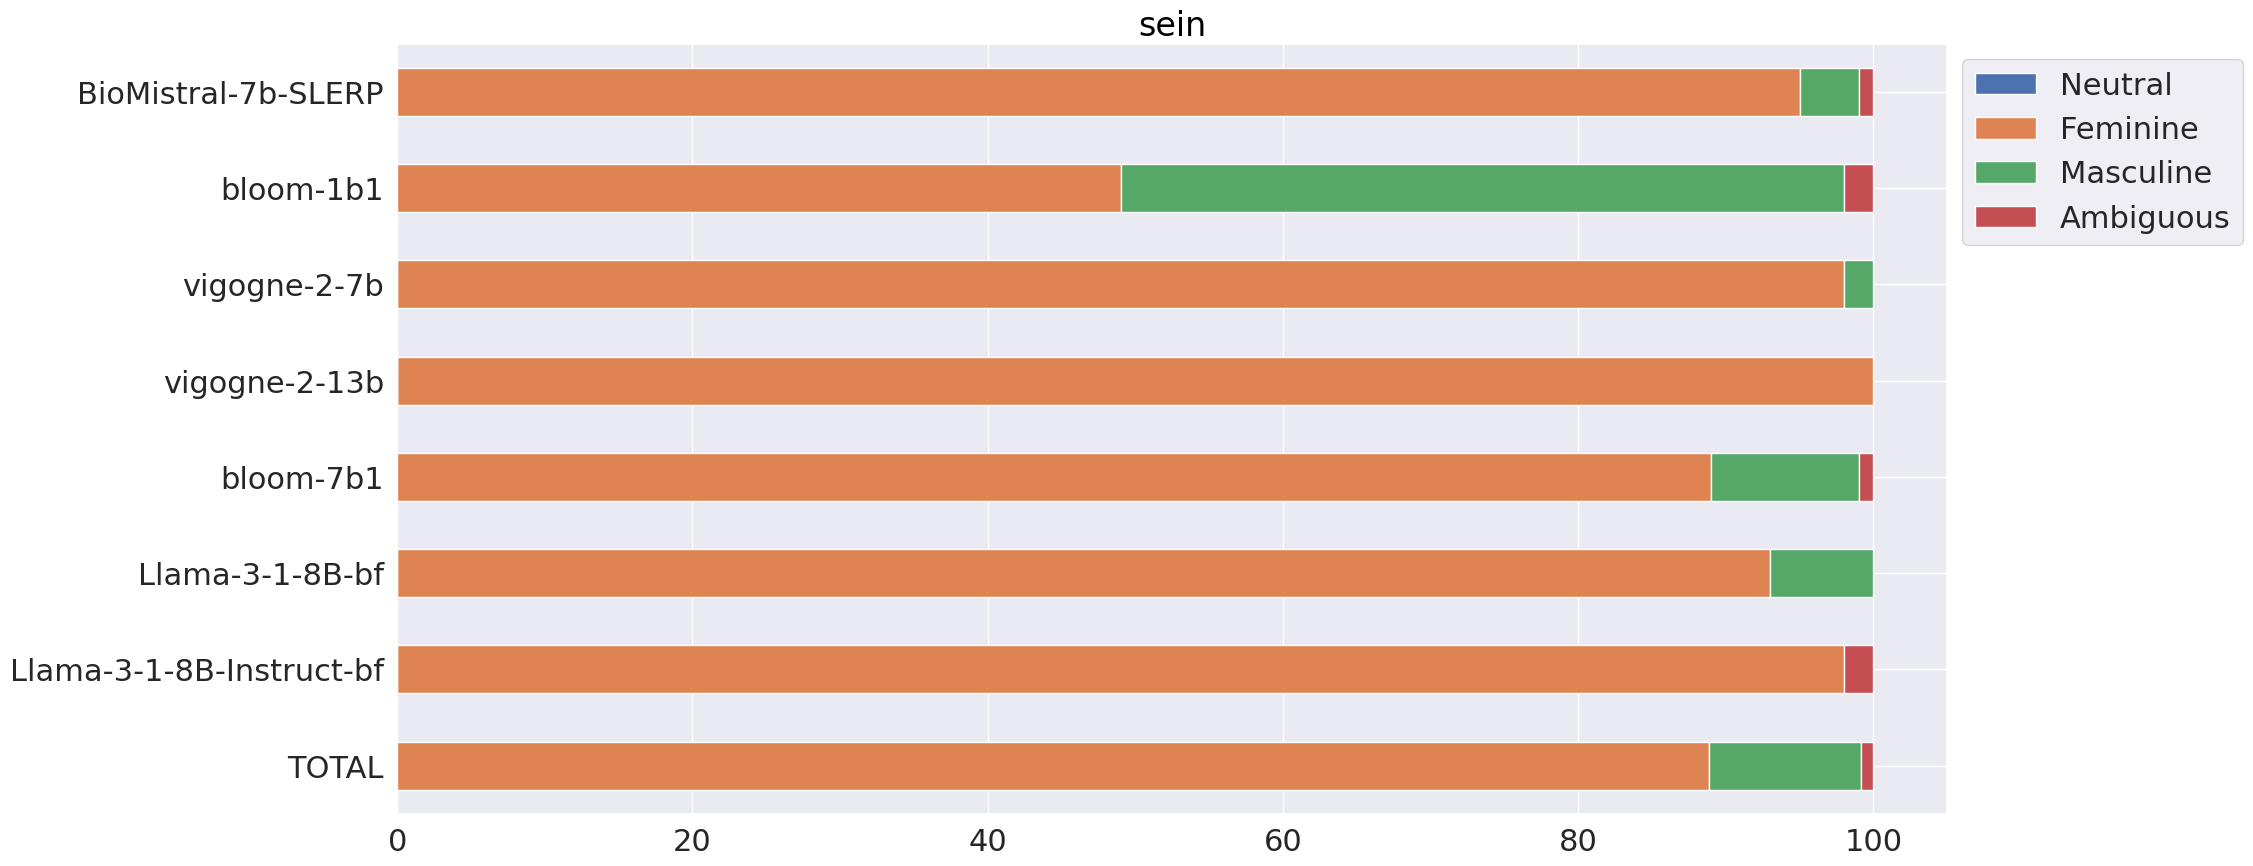

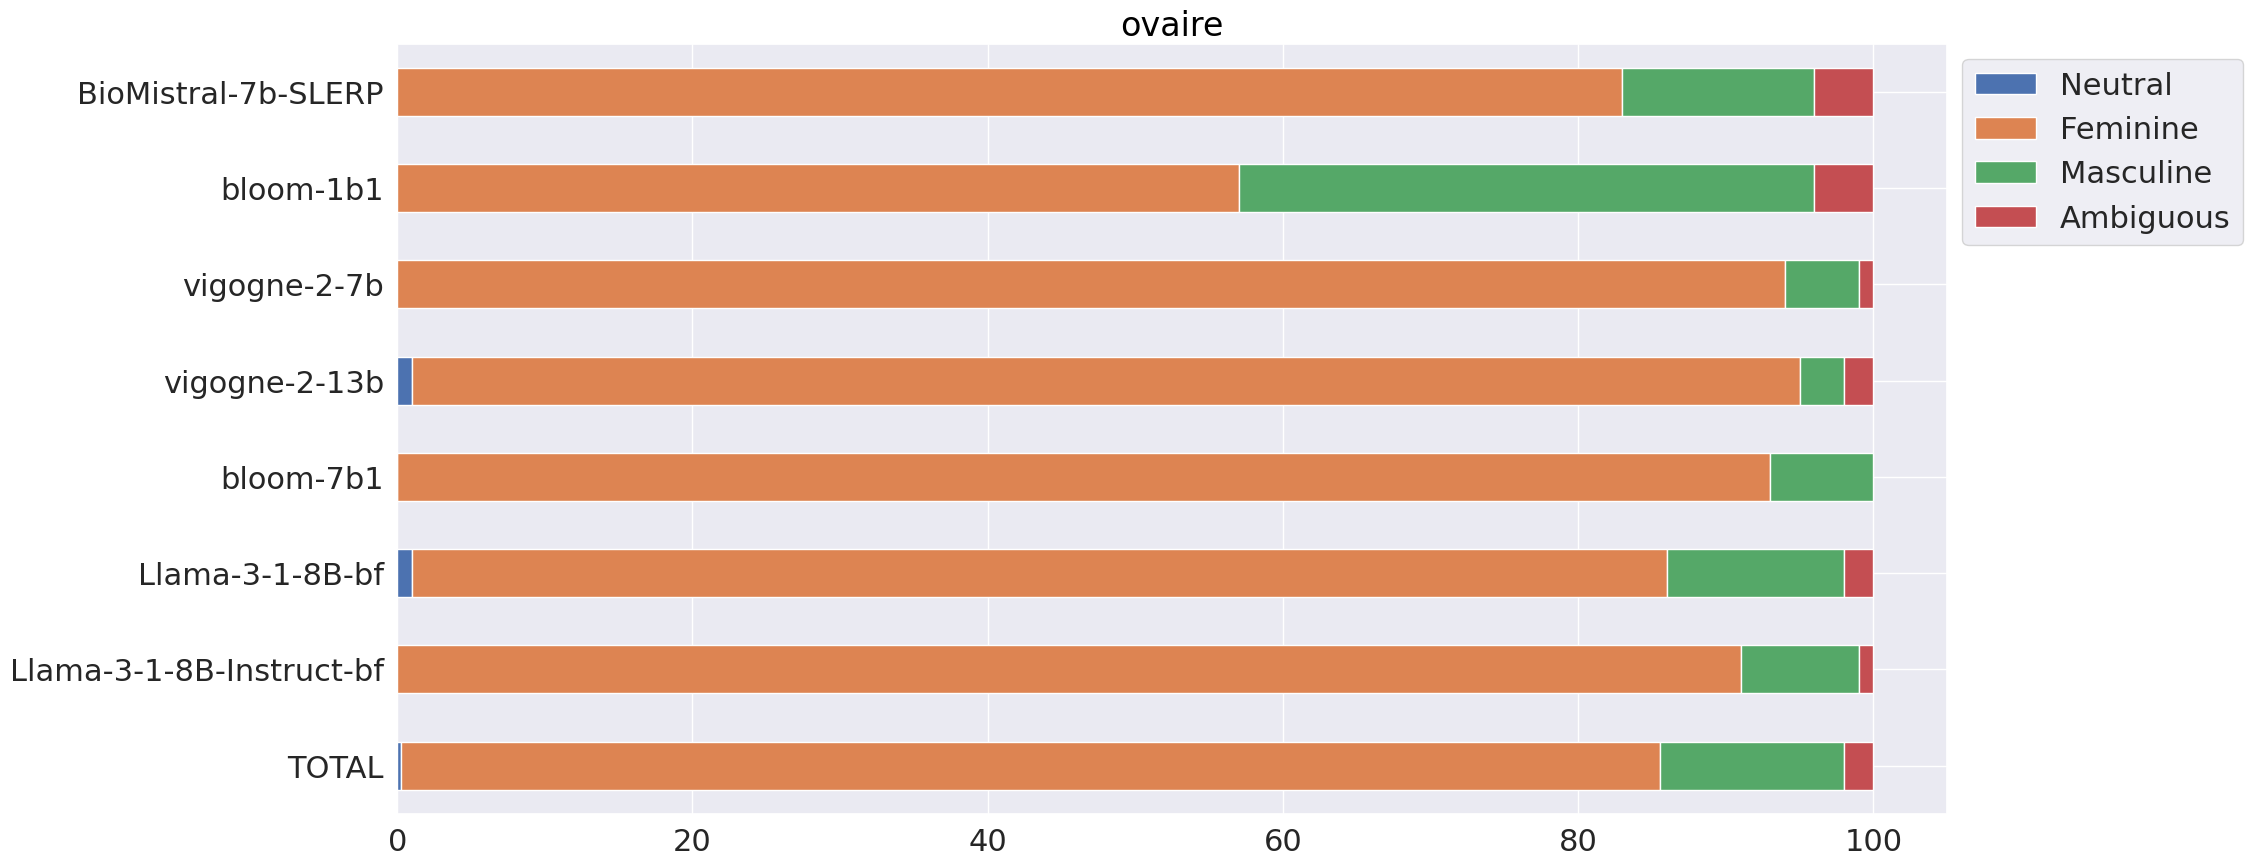

In [20]:
"""Ordre par topic, puis par modèle"""

"""ATTENTION CHANGEMENT DE COULEURS, À CORRIGER #TODO"""

#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]
for topic in topics:
    table = []
    for model in modeles:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['model'] = model
        table.append(op)

    print("\n",topic)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    new_dic = {}
    for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
        new_dic[genre] = sum([d[genre] for d in table_new])/len(table_new)
    #table_new.append(new_dic)
    table_new.insert(0,new_dic)
    
    """    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    table_new.append(total)"""

    df = pd.DataFrame(table_new, index=["TOTAL"]+modeles)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(topic,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"analyse_fig-tables/gender_per_topic+model_{topic}.png",bbox_inches = "tight")
    ax.plot()

## Stylométrie (stats sur les textes)

Quelques statistiques & graphiques sur les données : moyenne de nombre de mots, de caractères, de mots uniques
(fonction adaptée de code trouvé en ligne : https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e )

In [21]:
def stats_donnees(dataset, label, filtre_model=None):
    cat_m="Masculine"
    cat_f="Feminine"
    cat_n="Neutral"
    cat_a = "Ambiguous"
    
    if filtre_model:
        dataset = dataset[dataset["model"]==filtre_model]
    
    #1. WORD-COUNT
    dataset['word_count'] = dataset["generation"].apply(lambda x: len(str(x).split()))
    
    #2. CHARACTER-COUNT
    dataset['char_count'] = dataset['generation'].apply(lambda x: len(str(x)))

    #3. UNIQUE WORD-COUNT
    dataset['unique_word_count'] = dataset['generation'].apply(lambda x: len(set(str(x).split())))
    
    res_word= {"Masc": dataset[dataset[label]==cat_m]['word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['word_count'].mean(),
              }
    
    res_char= {"Masc": dataset[dataset[label]==cat_m]['char_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['char_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['char_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['char_count'].mean()}

    res_uniqueword= {"Masc": dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['unique_word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['unique_word_count'].mean()}

    
    return res_char, res_word, res_uniqueword


table = []
print("Char")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[0]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nWord")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[1]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nUnique word")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[2]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))

"""for model in modeles:
    print("\n ---", model)
    stats_donnees(data_genre, label, model)
    print("*"*60)"""

Char
   Masc      Fem    Ambigu    total  model                       Neutre
-------  -------  --------  -------  ------------------------  --------
3514.11  3850.65   3171.31  3512.03  Llama-3-1-8B-Instruct-bf
3883.61  3971.4    3843.72  3633.68  Llama-3-1-8B-bf            2836
5409.56  5278.88   5045.14  5271.9   bloom-7b1                  5354
3894.89  3783.32   3902.59  3827.16  vigogne-2-13b              3727.83
3496.07  3722.9    3543.66  3334.41  vigogne-2-7b               2575
5397.4   5321.95   5135.62  5215.66  bloom-1b1                  5007.67
3867.26  3824.9    3850.06  3847.41  BioMistral-7b-SLERP

Word
   Masc      Fem    Ambigu    total  model                       Neutre
-------  -------  --------  -------  ------------------------  --------
524.924  580.334   479.688  528.315  Llama-3-1-8B-Instruct-bf
582.018  606.872   575.24   544.907  Llama-3-1-8B-bf            415.5
812.834  806.786   745.714  797.084  bloom-7b1                  823
571.623  567.331   572.364  559

'for model in modeles:\n    print("\n ---", model)\n    stats_donnees(data_genre, label, model)\n    print("*"*60)'

In [248]:
"""PRÉPARER FICHIERS TXT POUR TXM"""
for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
    df_genre = data_genre[data_genre["Identified_gender"]==genre]
    with open(f"txm/global_{genre}.txt", "w") as f:
        f.write(str(list(df_genre["output"])))